#  <span style="color:#3366ff"> <strong> Anticipation du retard de vol d'avions (Arnaud ROUSSEAU) </strong>

# <span style="color:#3366ff"> 28 Juin 2018 (Part 1 NonCleanée)

<span style="color:#3366ff"> Ce notebook est dédié au nettoyage des 12 bases de données de Vols Aériens et de leur concaténation afin de créer une base exploitable.

### Importation des librairies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import scipy.stats as st

from sklearn import decomposition, preprocessing

# <span style="color:#3366ff">  Chargement des 12 bases, sampling, concatenation, description & analyse

<span style="color:#3366ff"> L'ensemble des vols décrits dans les 12 bases représentent plus de 5 millions de lignes. Pour des raison de puissance de calcul, seul 10% de ces vols seront conservés.

## <span style="color:#3366ff">  CSV 1

In [2]:
data_plane_raw_1= pd.read_csv(
    'DATA/2016_01.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape1 = data_plane_raw_1.shape

print("Cette base de données contient",shape1[0], 
      "vols décrits avec", shape1[1], "paramètres (dont cases vides).")

Cette base de données contient 445827 vols décrits avec 65 paramètres (dont cases vides).


In [3]:
pd.options.display.max_columns=999
data_plane_raw_1.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1057.0,-3.0,0.0,0.0,-1.0,1100-1159,15.0,1112.0,1424.0,8.0,1438,1432.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1056.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1110.0,1416.0,10.0,1438,1426.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1055.0,-5.0,0.0,0.0,-1.0,1100-1159,21.0,1116.0,1431.0,14.0,1438,1445.0,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1102.0,2.0,2.0,0.0,0.0,1100-1159,13.0,1115.0,1424.0,9.0,1438,1433.0,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1100,1240.0,100.0,100.0,1.0,6.0,1100-1159,20.0,1300.0,1617.0,14.0,1438,1631.0,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


In [4]:
data_plane_raw_1.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,445827.0,445827.0,445827.0,445827.000000,445827.000000,445827.000000,445827.000000,445827.000000,4.458270e+05,445827.000000,445827.000000,445827.00000,445827.000000,4.458270e+05,445827.000000,445827.000000,445827.000000,445827.000000,434354.000000,434354.000000,434354.000000,434354.000000,434354.000000,434227.000000,434227.000000,433920.000000,433920.000000,445827.000000,433920.000000,433298.000000,433298.000000,433298.000000,433298.000000,445827.000000,445827.000000,445827.000000,433298.000000,433298.000000,445827.0,445827.000000,445827.000000,70882.000000,70882.000000,70882.000000,70882.000000,70882.000000,2552.000000,2552.000000,2552.000000,0.0
mean,2016.0,1.0,1.0,15.893510,4.113815,19903.085069,2078.856456,12682.120789,1.268215e+06,31723.938281,25.724613,55.65243,12681.700924,1.268173e+06,31723.664890,25.729274,55.652870,1330.384387,1334.236268,7.793537,10.774681,0.163585,-0.076233,16.449422,1356.554065,1483.300601,7.294298,1502.951591,1488.101445,1.533654,10.556042,0.163587,-0.376575,0.026165,0.001938,146.499142,140.135200,116.395818,1.0,844.233880,3.848746,20.921912,2.836573,12.680455,0.080415,21.635450,1236.022335,32.054075,31.776254,NaN
std,0.0,0.0,0.0,8.936692,2.005007,382.853084,1757.269780,1529.485604,1.529483e+05,1280.460591,16.752301,26.95134,1529.329960,1.529327e+05,1280.213952,16.751373,26.949279,482.809711,492.955466,36.833007,35.780277,0.369899,1.945120,9.169353,493.866371,514.352310,5.437682,505.240190,518.681533,39.096842,35.235580,0.369901,2.074161,0.159626,0.043980,76.606607,74.753951,72.981191,0.0,610.349957,2.396397,57.041917,23.306995,24.859425,2.070844,41.991917,513.040425,25.993098,25.698255,NaN
min,2016.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,1.000000,1.00000,10135.000000,1.013503e+06,30070.000000,1.000000,1.000000,1.000000,1.000000,-47.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-79.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,21.000000,15.000000,8.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,NaN
25%,2016.0,1.0,1.0,8.000000,2.000000,19790.000000,702.000000,11292.000000,1.129202e+06,30615.000000,12.000000,34.00000,11292.000000,1.129202e+06,30615.000000,12.000000,34.000000,920.000000,924.000000,-5.000000,0.000000,0.000000,-1.000000,11.000000,939.000000,1104.000000,4.000000,1118.000000,1108.000000,-15.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,90.000000,85.000000,62.000000,1.0,391.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,805.000000,15.000000,15.000000,NaN
50%,2016.0,1.0,1.0,16.000000,4.000000,19805.000000,1594.000000,12889.000000,1.288903e+06,31453.000000,24.000000,52.00000,12889.000000,1.288903e+06,31453.000000,24.000000,52.000000,1325.000000,1331.000000,-2.000000,0.000000,0.000000,-1.000000,14.000000,1344.000000,1519.000000,6.000000,1527.000000,1522.000000,-7.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,128.000000,122.000000,98.000000,1.0,679.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1149.000000,25.000000,25.000000,NaN
75%,2016.0,1.0,1.0,24.000000,6.000000,20304.000000,2763.000000,14027.000000,1.402702e+06,32467.000000,40.000000,82.00000,14027.000000,1.402702e+06,32467.000000,40.000000,82.000000,1730.000000,1737.000000,5.000000,5.000000,0.000000,0

<strong> Sampling de 10 %

In [5]:
shape1_sample = shape1[0]*10/100
shape1_sample = int(shape1_sample)
shape1_sample

44582

In [6]:
data_plane_raw_1_s = data_plane_raw_1.sample(shape1_sample)

In [7]:
unique_carrier_value = data_plane_raw_1_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['DL', 'AS', 'WN', 'B6', 'HA', 'NK', 'EV', 'AA', 'OO', 'UA', 'F9',
       'VX'], dtype=object)

## <span style="color:#3366ff">  CSV 2

In [8]:
data_plane_raw_2= pd.read_csv(
    'DATA/2016_02.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape2 = data_plane_raw_2.shape

print("Cette base de données contient",shape2[0], 
      "vols décrits avec", shape2[1], "paramètres (dont cases vides).")

Cette base de données contient 423889 vols décrits avec 65 paramètres (dont cases vides).


In [9]:
data_plane_raw_2.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,2,10,3,2016-02-10,F9,20436,F9,N908FR,1141,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1210,1202.0,-8.0,0.0,0.0,-1.0,1200-1259,15.0,1217.0,1241.0,6.0,1320,1247.0,-33.0,0.0,0.0,-2.0,1300-1359,0.0,NaN,0.0,190.0,165.0,144.0,1.0,1090.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,2,10,3,2016-02-10,F9,20436,F9,N908FR,1226,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13342,1334205,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,1410,1401.0,-9.0,0.0,0.0,-1.0,1400-1459,14.0,1415.0,1917.0,19.0,1945,1936.0,-9.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,215.0,215.0,182.0,1.0,1524.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,2,10,3,2016-02-10,F9,20436,F9,N908FR,1227,13342,1334205,33342,MKE,"Milwaukee, WI",WI,55,Wisconsin,45,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,2030,2013.0,-17.0,0.0,0.0,-2.0,2000-2059,15.0,2028.0,2157.0,9.0,2230,2206.0,-24.0,0.0,0.0,-2.0,2200-2259,0.0,NaN,0.0,240.0,233.0,209.0,1.0,1524.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,2,10,3,2016-02-10,F9,20436,F9,N908FR,1262,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13930,1393004,30977,ORD,"Chicago, IL",IL,17,Illinois,41,2330,2326.0,-4.0,0.0,0.0,-1.0,2300-2359,18.0,2344.0,452.0,10.0,515,502.0,-13.0,0.0,0.0,-1.0,0001-0559,0.0,NaN,0.0,225.0,216.0,188.0,1.0,1514.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,2,10,3,2016-02-10,F9,20436,F9,N910FR,1280,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,13930,1393004,30977,ORD,"Chicago, IL",IL,17,Illinois,41,700,655.0,-5.0,0.0,0.0,-1.0,0700-0759,14.0,709.0,1002.0,37.0,1048,1039.0,-9.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,168.0,164.0,113.0,1.0,888.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
shape2_sample = shape2[0]*10/100
shape2_sample = int(shape2_sample)
shape2_sample

42388

In [11]:
data_plane_raw_2_s = data_plane_raw_2.sample(shape2_sample)

In [12]:
unique_carrier_value = data_plane_raw_2_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['WN', 'AA', 'DL', 'OO', 'F9', 'B6', 'UA', 'EV', 'AS', 'NK', 'VX',
       'HA'], dtype=object)

## <span style="color:#3366ff">  CSV 3

In [13]:
data_plane_raw_3= pd.read_csv(
    'DATA/2016_03.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape3 = data_plane_raw_3.shape

print("Cette base de données contient",shape3[0], 
      "vols décrits avec", shape3[1], "paramètres (dont cases vides).")

Cette base de données contient 479122 vols décrits avec 65 paramètres (dont cases vides).


In [14]:
shape3_sample = shape3[0]*10/100
shape3_sample = int(shape3_sample)
shape3_sample

47912

In [15]:
data_plane_raw_3_s = data_plane_raw_3.sample(shape3_sample)

In [16]:
unique_carrier_value = data_plane_raw_3_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['UA', 'WN', 'AA', 'EV', 'OO', 'B6', 'DL', 'HA', 'AS', 'F9', 'NK',
       'VX'], dtype=object)

## <span style="color:#3366ff">  CSV 4

In [17]:
data_plane_raw_4= pd.read_csv(
    'DATA/2016_04.csv', 
    #sep='\t', 
    encoding='utf-8', 
    error_bad_lines=False,
    low_memory = False)

shape4 = data_plane_raw_4.shape

print("Cette base de données contient",shape4[0], 
      "vols décrits avec", shape4[1], "paramètres (dont cases vides).")

Cette base de données contient 461630 vols décrits avec 65 paramètres (dont cases vides).


In [18]:
data_plane_raw_4.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,2,4,11,1,2016-04-11,F9,20436,F9,N943FR,1280,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,13930,1393004,30977,ORD,"Chicago, IL",IL,17,Illinois,41,700,653.0,-7.0,0.0,0.0,-1.0,0700-0759,15.0,708.0,1001.0,31.0,1042,1032.0,-10.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,162.0,159.0,113.0,1.0,888.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2,4,11,1,2016-04-11,F9,20436,F9,N943FR,1263,13930,1393004,30977,ORD,"Chicago, IL",IL,17,Illinois,41,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1135,1127.0,-8.0,0.0,0.0,-1.0,1100-1159,12.0,1139.0,1248.0,6.0,1340,1254.0,-46.0,0.0,0.0,-2.0,1300-1359,0.0,NaN,0.0,245.0,207.0,189.0,1.0,1514.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2,4,11,1,2016-04-11,F9,20436,F9,N943FR,1240,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,1425,1420.0,-5.0,0.0,0.0,-1.0,1400-1459,12.0,1432.0,1902.0,42.0,1930,1944.0,14.0,14.0,0.0,0.0,1900-1959,0.0,NaN,0.0,185.0,204.0,150.0,1.0,1222.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2,4,11,1,2016-04-11,F9,20436,F9,N943FR,1243,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,2015,2035.0,20.0,20.0,1.0,1.0,2000-2059,10.0,2045.0,2141.0,8.0,2150,2149.0,-1.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,215.0,194.0,176.0,1.0,1222.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2,4,11,1,2016-04-11,F9,20436,F9,N943FR,1232,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,2320,2318.0,-2.0,0.0,0.0,-1.0,2300-2359,17.0,2335.0,624.0,8.0,710,632.0,-38.0,0.0,0.0,-2.0,0700-0759,0.0,NaN,0.0,290.0,254.0,229.0,1.0,2174.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
shape4_sample = shape4[0]*10/100
shape4_sample = int(shape4_sample)
shape4_sample

46163

In [20]:
data_plane_raw_4_s = data_plane_raw_4.sample(shape4_sample)

In [21]:
unique_carrier_value = data_plane_raw_4_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['AA', 'B6', 'WN', 'UA', 'DL', 'EV', 'AS', 'OO', 'F9', 'VX', 'NK',
       'HA'], dtype=object)

## <span style="color:#3366ff">  CSV 5

In [22]:
data_plane_raw_5= pd.read_csv(
    'DATA/2016_05.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape5 = data_plane_raw_5.shape

print("Cette base de données contient",shape5[0], 
      "vols décrits avec", shape5[1], "paramètres (dont cases vides).")

Cette base de données contient 479358 vols décrits avec 65 paramètres (dont cases vides).


In [23]:
shape5_sample = shape5[0]*10/100
shape5_sample = int(shape5_sample)
shape5_sample

47935

In [24]:
data_plane_raw_5_s = data_plane_raw_5.sample(shape5_sample)

In [25]:
unique_carrier_value = data_plane_raw_5_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['WN', 'AS', 'OO', 'DL', 'NK', 'AA', 'UA', 'EV', 'F9', 'B6', 'HA',
       'VX'], dtype=object)

## <span style="color:#3366ff">  CSV 6

In [26]:
data_plane_raw_6= pd.read_csv(
    'DATA/2016_06.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape6 = data_plane_raw_6.shape

print("Cette base de données contient",shape6[0], 
      "vols décrits avec", shape6[1], "paramètres (dont cases vides).")

Cette base de données contient 487637 vols décrits avec 65 paramètres (dont cases vides).


In [27]:
shape6_sample = shape6[0]*10/100
shape6_sample = int(shape6_sample)
shape6_sample

48763

In [28]:
data_plane_raw_6_s = data_plane_raw_6.sample(shape6_sample)

In [29]:
unique_carrier_value = data_plane_raw_6_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['AA', 'AS', 'WN', 'B6', 'UA', 'DL', 'VX', 'EV', 'HA', 'OO', 'F9',
       'NK'], dtype=object)

## <span style="color:#3366ff">  CSV 7

In [30]:
data_plane_raw_7= pd.read_csv(
    'DATA/2016_07.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape7 = data_plane_raw_7.shape

print("Cette base de données contient",shape7[0], 
      "vols décrits avec", shape7[1], "paramètres (dont cases vides).")

Cette base de données contient 502457 vols décrits avec 65 paramètres (dont cases vides).


In [31]:
shape7_sample = shape7[0]*10/100
shape7_sample = int(shape7_sample)
shape7_sample

50245

In [32]:
data_plane_raw_7_s = data_plane_raw_7.sample(shape7_sample)

In [33]:
unique_carrier_value = data_plane_raw_7_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['EV', 'OO', 'DL', 'UA', 'AA', 'WN', 'NK', 'VX', 'AS', 'F9', 'B6',
       'HA'], dtype=object)

## <span style="color:#3366ff">  CSV 8

In [34]:
data_plane_raw_8= pd.read_csv(
    'DATA/2016_08.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape8 = data_plane_raw_8.shape

print("Cette base de données contient",shape8[0], 
      "vols décrits avec", shape8[1], "paramètres (dont cases vides).")

Cette base de données contient 498347 vols décrits avec 65 paramètres (dont cases vides).


In [35]:
shape8_sample = shape8[0]*10/100
shape8_sample = int(shape8_sample)
shape8_sample

49834

In [36]:
data_plane_raw_8_s = data_plane_raw_8.sample(shape8_sample)

In [37]:
unique_carrier_value = data_plane_raw_8_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['AA', 'OO', 'UA', 'B6', 'AS', 'WN', 'DL', 'NK', 'VX', 'EV', 'F9',
       'HA'], dtype=object)

## <span style="color:#3366ff">  CSV 9

In [38]:
data_plane_raw_9= pd.read_csv(
    'DATA/2016_09.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape9 = data_plane_raw_9.shape

print("Cette base de données contient",shape9[0], 
      "vols décrits avec", shape9[1], "paramètres (dont cases vides).")

Cette base de données contient 454878 vols décrits avec 65 paramètres (dont cases vides).


In [39]:
shape9_sample = shape9[0]*10/100
shape9_sample = int(shape9_sample)
shape9_sample

45487

In [40]:
data_plane_raw_9_s = data_plane_raw_9.sample(shape9_sample)

In [41]:
unique_carrier_value = data_plane_raw_9_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['AA', 'B6', 'F9', 'HA', 'DL', 'EV', 'UA', 'NK', 'WN', 'OO', 'VX',
       'AS'], dtype=object)

## <span style="color:#3366ff">  CSV 10

In [42]:
data_plane_raw_10= pd.read_csv(
    'DATA/2016_10.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape10 = data_plane_raw_10.shape

print("Cette base de données contient",shape10[0], 
      "vols décrits avec", shape10[1], "paramètres (dont cases vides).")

Cette base de données contient 472626 vols décrits avec 65 paramètres (dont cases vides).


In [43]:
shape10_sample = shape10[0]*10/100
shape10_sample = int(shape10_sample)
shape10_sample

47262

In [44]:
data_plane_raw_10_s = data_plane_raw_10.sample(shape10_sample)

In [45]:
unique_carrier_value = data_plane_raw_10_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['WN', 'DL', 'OO', 'AA', 'UA', 'B6', 'EV', 'NK', 'AS', 'HA', 'F9',
       'VX'], dtype=object)

## <span style="color:#3366ff">  CSV 11

In [46]:
data_plane_raw_11= pd.read_csv(
    'DATA/2016_11.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape11 = data_plane_raw_11.shape

print("Cette base de données contient",shape11[0], 
      "vols décrits avec", shape11[1], "paramètres (dont cases vides).")

Cette base de données contient 376714 vols décrits avec 65 paramètres (dont cases vides).


In [47]:
shape11_sample = shape11[0]*10/100
shape11_sample = int(shape11_sample)
shape11_sample

37671

In [48]:
data_plane_raw_11_s = data_plane_raw_11.sample(shape11_sample)

In [49]:
unique_carrier_value = data_plane_raw_11_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['DL', 'OO', 'EV', 'WN', 'UA', 'AA', 'HA', 'NK', 'AS', 'B6', 'VX',
       'F9'], dtype=object)

## <span style="color:#3366ff">  CSV 12

In [50]:
data_plane_raw_12= pd.read_csv(
    'DATA/2016_12.csv', 
    #sep='\t', 
    encoding='utf-8', 
    low_memory = False)

shape12 = data_plane_raw_12.shape

print("Cette base de données contient",shape12[0], 
      "vols décrits avec", shape12[1], "paramètres (dont cases vides).")

Cette base de données contient 447141 vols décrits avec 65 paramètres (dont cases vides).


In [51]:
shape12_sample = shape12[0]*10/100
shape12_sample = int(shape12_sample)
shape12_sample

44714

In [52]:
data_plane_raw_12_s = data_plane_raw_12.sample(shape12_sample)

In [53]:
unique_carrier_value = data_plane_raw_12_s['UNIQUE_CARRIER'].unique()
unique_carrier_value

array(['UA', 'VX', 'DL', 'AA', 'AS', 'B6', 'EV', 'OO', 'WN', 'NK', 'F9',
       'HA'], dtype=object)

## Concaténation des 12 bases samplées

In [54]:
data_plane_raw_full_s = pd.concat([data_plane_raw_1_s, data_plane_raw_2_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_3_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_4_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_5_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_6_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_7_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_8_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_9_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_10_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_11_s])
data_plane_raw_full_s = pd.concat([data_plane_raw_full_s, data_plane_raw_12_s])

## Recherche des Nan dans la nouvelle base concaténée

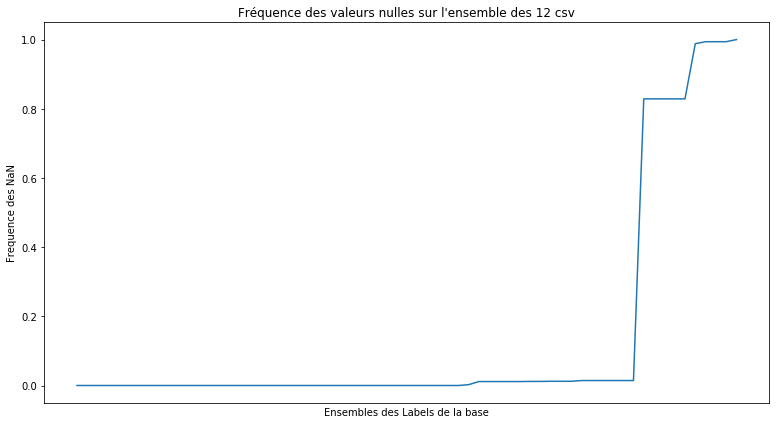

In [55]:
freq_null_raw= data_plane_raw_full_s.isnull().mean().sort_values()

plt.figure(figsize=(13,7))

ax = plt.subplot()
ax.set_title("Fréquence des valeurs nulles sur l'ensemble des 12 csv")
plt.ylabel("Frequence des NaN")
plt.xlabel("Ensembles des Labels de la base")
#plt.xticks() 
plt.xticks([]) 

plt.plot(freq_null_raw)

plt.show()

In [56]:
data_plane_raw_full_s.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

## <span style="color:#ff0000"> <strong> Description des paramètres

<span style="color:#3366ff">  <strong> Time Period________________________________________________________________________________________________________  </strong>   
'YEAR' : les 12 csv sont de 2016 <span style="color:#ff0000"> ------> NOK, tout se passe en 2016 </span>         
'QUARTER', <span style="color:#ff0000"> ------> NOK </span>          
'MONTH', <span style="color:#00cc00"> <strong> ------> OK, mois à forte mobilisation </strong> </span>             
'DAY_OF_MONTH', <span style="color:#00cc00"> <strong> ------> OK, jours à forte mobilisation </strong> </span>             
'DAY_OF_WEEK', <span style="color:#00cc00"> <strong> ------> OK, jours à forte mobilisation </strong> </span>           
'FL_DATE',   <span style="color:#ff0000"> ------> NOK 

<span style="color:#3366ff">  <strong> Airline____________________________________________________________________________________________________________________  </strong>         
'UNIQUE_CARRIER', Code de transporteur unique. Lorsque le même code a été utilisé par plusieurs opérateurs, un suffixe numérique est utilisé pour les utilisateurs précédents, par exemple, PA, PA (1), PA (2). Utilisez ce champ pour l'analyse sur plusieurs années. <span style="color:#00cc00"> <strong> ------> OK, ID compagnie Aérienne unique, Index </strong>         
    
<span style="color:#3366ff">   'AIRLINE_ID', Un numéro d'identification attribué par US DOT pour identifier une compagnie aérienne unique (transporteur). Une compagnie aérienne unique (transporteur) est définie comme une exploitation et une déclaration sous le même certificat DOT, quel que soit son code, son nom ou sa société de portefeuille. <span style="color:#ff0000"> ------> NOK, redondant     
    
<span style="color:#3366ff">   'CARRIER', Code attribué par l'IATA et couramment utilisé pour identifier un transporteur. Comme le même code peut avoir été attribué à différents transporteurs au fil du temps, le code n'est pas toujours unique. Pour l'analyse, utilisez le code de transporteur unique. <span style="color:#ff0000"> ------> NOK, pas unique </span>  

<span style="color:#3366ff">   'TAIL_NUM', Numéro d'Avion (queue) <span style="color:#00cc00"> <span style="color:#ff0000"> ------> NOK, le même avion ne peut pas être tout le temps en retard + string         

<span style="color:#3366ff">   'FL_NUM', Numéro de Vol <span style="color:#ff0000"> ------> NOK, après conversion en bool, trop de variables uniques.    

<span style="color:#3366ff">  <strong> Origin______________________________________________________________________________________________________________________  </strong>    
'ORIGIN_AIRPORT_ID', Aéroport d'origine, ID de l'aéroport. Un numéro d'identification attribué par US DOT pour identifier un aéroport unique. Utilisez ce champ pour l'analyse des aéroports sur plusieurs années, car un aéroport peut modifier son code d'aéroport et les codes d'aéroport peuvent être réutilisés. <span style="color:#00cc00"> <strong> ------> OK, string à transformer en bool </strong> </span>   
</span>    ex  "LYP","Faisalabad, Pakistan: Faisalabad International"      
        "LYR","Longyearbyen, Norway: Svalbard"    
        "LYS","Lyon, France: Lyon Saint Exupery"      
    
            
<span style="color:#3366ff">  'ORIGIN_AIRPORT_SEQ_ID', Aéroport d'origine, ID de séquence d'aéroport. Un numéro d'identification attribué par US DOT pour identifier un aéroport unique à un moment donné. Les attributs de l'aéroport, tels que le nom ou les coordonnées de l'aéroport, peuvent changer avec le temps. <span style="color:#ff0000"> ------> NOK, pas unique </span>     
</span>    ex  "1314301","Lyon, France: Satolas"     
        "1314302","Lyon, France: Saint Exupery"     
        "1314303","Lyon, France: Saint Exupery"      
        "1314304","Lyon, France: Lyon Saint Exupery"      
        "1314305","Lyon, France: Saint Exupery"     
        "1314306","Lyon, France: Lyon Saint Exupery"     


<span style="color:#3366ff">  'ORIGIN_CITY_MARKET_ID', Aéroport d'origine, ID du marché de la ville. City Market ID est un numéro d'identification attribué par US DOT pour identifier un marché urbain. Utilisez ce champ pour regrouper les aéroports desservant le même marché urbain. <span style="color:#ff0000"> ------> NOK, sans interet </span>     
</span>    ex  "30609","Beihai, China"     
        "30610","Belo Horizonte, Brazil"      
        "30611","Bastia, France"      
    
    
<span style="color:#3366ff">  'ORIGIN', Aéroport d'origine <span style="color:#ff0000"> ------> NOK, redondant   
    
<span style="color:#3366ff">  'ORIGIN_CITY_NAME', Aéroport d'origine, nom de la ville <span style="color:#ff0000"> ------> NOK, redondant     
    
<span style="color:#3366ff">  'ORIGIN_STATE_ABR',  Aéroport d'origine, Abréviation du nom de l'Etat (US ???) <span style="color:#ff0000"> ------> NOK, redondant    
    
<span style="color:#3366ff">  'ORIGIN_STATE_FIPS', Aéroport d'origine, "Federal Information Processing Standard state code", US <span style="color:#ff0000"> ------> NOK, sans interet, US only    
    
<span style="color:#3366ff">  'ORIGIN_STATE_NM', Aéroport d'origine, nom de l'état (US ???) <span style="color:#ff0000"> ------> NOK, sans interet        
    
<span style="color:#3366ff">  'ORIGIN_WAC', Aéroport d'origine, World Area Code = Code de Région du Monde <span style="color:#ff0000"> ------> NOK, redondant     

<span style="color:#3366ff">  <strong> Destination______________________________________________________________________________________________________________________ </strong>     
<span style="color:#3366ff">  'DEST_AIRPORT_ID', Aéroport de destination, ID de l'aéroport. Un numéro d'identification attribué par US DOT pour identifier un aéroport unique. Utilisez ce champ pour l'analyse des aéroports sur plusieurs années, car un aéroport peut modifier son code d'aéroport et les codes d'aéroport peuvent être réutilisés. <span style="color:#00cc00"> <strong> ------> OK, string à transformer en bool  </strong>            
    
<span style="color:#3366ff">  'DEST_AIRPORT_SEQ_ID', Aéroport de destination, ID de séquence d'aéroport. Un numéro d'identification attribué par US DOT pour identifier un aéroport unique à un moment donné. Les attributs de l'aéroport, tels que le nom ou les coordonnées de l'aéroport, peuvent changer avec le temps. <span style="color:#ff0000"> ------> NOK, pas unique </span>        
    
<span style="color:#3366ff">  'DEST_CITY_MARKET_ID', Aéroport de destination, ID du marché de la ville. City Market ID est un numéro d'identification attribué par US DOT pour identifier un marché urbain. Utilisez ce champ pour regrouper les aéroports desservant le même marché urbain. <span style="color:#ff0000"> ------> NOK, redondant        
    
<span style="color:#3366ff">  'DEST', Aéroport de destination  <span style="color:#ff0000"> ------> NOK, redondant       
    
<span style="color:#3366ff">  'DEST_CITY_NAME', Aéroport de destination, nom de la ville  <span style="color:#ff0000"> ------> NOK, redondant        
    
<span style="color:#3366ff">  'DEST_STATE_ABR', Aéroport de destination, Abréviation de l'état <span style="color:#ff0000"> ------> NOK, sans interet       
    
<span style="color:#3366ff">  'DEST_STATE_FIPS', Aéroport de destination, "Federal Information Processing Standard state code", US    <span style="color:#ff0000"> ------> NOK, US only            
    
<span style="color:#3366ff">  'DEST_STATE_NM', Aéroport de destination, nom de l'état <span style="color:#ff0000"> ------> NOK, US only               
    
<span style="color:#3366ff">  'DEST_WAC', Aéroport de destination, World Area Code = Code de Région du Monde  <span style="color:#ff0000"> ------> NOK, redondant               


<span style="color:#3366ff">  <strong> Departure Performance_____________________________________________________________________________________________________ </strong>     
<span style="color:#3366ff">  'CRS_DEP_TIME', Heure de départ du CRS/Course/Route de vol ? (heure locale: hhmm) <span style="color:#00cc00"> <strong> ------> OK (impact heure de pointe ?)  </strong>      
-> CRS = Computer Reservation System. CRS provide information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets. ( Airline On-Time Performance Data )    
     
    
<span style="color:#3366ff">  'DEP_TIME', Heure de départ réelle (heure locale: hhmm), <span style="color:#ff0000"> ------> NOK, pas info à fortiori        
    
<span style="color:#3366ff">  'DEP_DELAY', Différence de minutes entre l'heure de départ prévue et réelle. Les départs anticipés montrent des nombres négatifs. <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 5   </strong>               
    
<span style="color:#3366ff">  'DEP_DELAY_NEW', ??? = DEP_DELAY_MINUTES ??? Différence de minutes entre l'heure de départ prévue et réelle. Départs anticipés à 0. <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 6   </strong>         
    
<span style="color:#3366ff">  'DEP_DEL15', Indicateur de retard de départ, 15 minutes ou plus (1 = Oui) <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 7   </strong>    
      
<span style="color:#3366ff">  'DEP_DELAY_GROUP', Intervalles de délai de départ, toutes les (15 minutes de <-15 à> 180) <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 8   </strong>                      
    
<span style="color:#3366ff">  'DEP_TIME_BLK', Heure de départ du vol, Intervalles horaires <span style="color:#ff0000"> ------> NOK, pas info à fortiori       
    
<span style="color:#3366ff">  TAXI_OUT', Temps en minutes sur la piste de décollage <span style="color:#ff0000"> ------> NOK, pas à fortiori, Taxiing = temps sur la piste de décollage     
    
<span style="color:#3366ff">  'WHEELS_OFF', Heure de décollage (local time: hhmm) <span style="color:#ff0000"> ------> NOK, pas à fortiori        		   


<span style="color:#3366ff">  <strong> Arrival Performance_______________________________________________________________________________________________________</strong>         
<span style="color:#3366ff">  'WHEELS_ON', Heure d'attérrissage (local time: hhmm) <span style="color:#ff0000"> ------> NOK, pas à fortiori              
    
<span style="color:#3366ff">  'TAXI_IN', Temps en minutes sur la piste d'attérrissage <span style="color:#ff0000"> ------> NOK, pas à fortiori, Taxiing = temps sur la piste de décollage                   
    
<span style="color:#3366ff">  'CRS_ARR_TIME', Heure d'arrivée du Vol/CRS (heure locale: hhmm) <span style="color:#00cc00"> <strong> ------> OK (impact heure de pointe ??) </strong>     
    
<span style="color:#3366ff">  'ARR_TIME', Heure d'arrivée réelle (heure locale: hhmm) <span style="color:#ff0000"> ------> NOK, pas à fortiori             
    
<span style="color:#3366ff">  'ARR_DELAY', Différence en minutes entre l'heure d'arrivée prévue et réelle. Les arrivées précoces montrent des nombres négatifs. <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 1   </strong>     
    
<span style="color:#3366ff">  'ARR_DELAY_NEW', ??? = ARR_DELAY_MINUTES ??? Différence en minutes entre l'heure d'arrivée prévue et réelle. Les arrivées précoces sont définies sur 0. <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 2</strong>    

<span style="color:#3366ff">  'ARR_DEL15', Indicateur de retard d'arrivée, 15 minutes ou plus (1 = Oui)  <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 3   </strong>    
    
<span style="color:#3366ff">  'ARR_DELAY_GROUP', Intervalles de retard d'arrivée, toutes les (15 minutes de <-15 à> 180) <span style="color:#00cc00"> <strong> ------> OK, "y" modèle 4   </strong>    
    
<span style="color:#3366ff">  'ARR_TIME_BLK', Bloc de temps d'arrivée , Intervalles horaires !!!!!!!!!!!!!!!    

<span style="color:#3366ff">  <strong> Cancellations and Diversions___________________________________________________________________________________________________</strong>   
<span style="color:#3366ff">  'CANCELLED', Indicateur de vol annulé (1 = Oui), <span style="color:#ff0000"> ------> NOK       
    
<span style="color:#3366ff">  'CANCELLATION_CODE',  Spécifie la raison de l'annulation, <span style="color:#ff0000"> ------> NOK        
    
<span style="color:#3366ff">  'DIVERTED', Indicateur de vol dévié/détourné (1 = Oui) <span style="color:#ff0000"> ------> NOK             


<span style="color:#3366ff">  <strong> Flight Summaries_____________________________________________________________________________________________________________</strong>  
<span style="color:#3366ff">  'CRS_ELAPSED_TIME', Temps de vol écoulé , en minutes <span style="color:#ff0000"> ------> NOK, pas à fortiori           
    
<span style="color:#3366ff">  'ACTUAL_ELAPSED_TIME', Temps de vol écoulé, en minutes <span style="color:#ff0000"> ------> NOK, pas à fortiori               
    
<span style="color:#3366ff">  'AIR_TIME', Temps de vol, en minutes <span style="color:#00cc00"> <strong> ------> OK </strong>                  
    
<span style="color:#3366ff">  'FLIGHTS',  Nombre de vols <span style="color:#00cc00"> <strong> ------> OK </strong>                
    
<span style="color:#3366ff">  'DISTANCE', Distance entre les aéroports (miles) <span style="color:#00cc00"> <strong> ------> OK</strong>                
    
<span style="color:#3366ff">  'DISTANCE_GROUP', Intervalles de distance, tous les 250 milles, pour le segment de vol <span style="color:#ff0000"> ------> NOK      
    

<span style="color:#3366ff">  <strong> Cause of Delay (Data starts 6/2003) ____________________________________________________________________________________ </strong>      
<span style="color:#3366ff">  'CARRIER_DELAY', Retard de l'avion, en minutes <span style="color:#ff0000"> ------> NOK            
    
<span style="color:#3366ff">  'WEATHER_DELAY', Retard météorologique, en minutes <span style="color:#ff0000"> ------> NOK        
    
<span style="color:#3366ff">  'NAS_DELAY', Retard du système aérien national, en minutes  <span style="color:#ff0000"> ------> NOK         
    
<span style="color:#3366ff">  'SECURITY_DELAY',  Retard de sécurité, en quelques minutes <span style="color:#ff0000"> ------> NOK       
    
<span style="color:#3366ff">  'LATE_AIRCRAFT_DELAY', Retard de l'avion, en minutes <span style="color:#ff0000"> ------> NOK         

<span style="color:#3366ff">  <strong> Gate Return Information at Origin Airport (Data starts 10/2008) ____________________________________________________________________________________ </strong>      
<span style="color:#3366ff">  'FIRST_DEP_TIME', Heure de départ de la première porte à l'aéroport d'origine <span style="color:#ff0000"> ------> NOK, sans interet         
    
<span style="color:#3366ff">  'TOTAL_ADD_GTIME', Temps total au sol à l'extérieur de la porte pour le retour ou le vol annulé  <span style="color:#ff0000"> ------> NOK, sans interet     
    
<span style="color:#3366ff">  'LONGEST_ADD_GTIME', Le plus long temps depuis la porte pour le retour de porte ou du vol annulé <span style="color:#ff0000"> ------> NOK, sans interet   
    

<span style="color:#3366ff">  <strong> Unnamed: 64:</strong> <span style="color:#ff0000"> ------> NOK, sans interet   

### Dropna Base 

In [57]:
# index
data_plane_CLEAN_s = data_plane_raw_full_s.dropna(axis = 0 , subset=['UNIQUE_CARRIER']) 
# X
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['MONTH']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DAY_OF_MONTH']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DAY_OF_WEEK']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['ORIGIN_AIRPORT_ID']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DEST_AIRPORT_ID']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['CRS_DEP_TIME'])
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['CRS_ARR_TIME'])
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['AIR_TIME']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['FLIGHTS']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DISTANCE']) 

data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['ORIGIN_WAC']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DEST_WAC']) 

# y X 8
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['ARR_DELAY']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['ARR_DELAY_NEW']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['ARR_DEL15']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['ARR_DELAY_GROUP']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DEP_DELAY'])  
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DEP_DELAY_NEW']) 
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DEP_DEL15'])
data_plane_CLEAN_s = data_plane_CLEAN_s.dropna(axis = 0 , subset=['DEP_DELAY_GROUP'])

In [58]:
data_plane_CLEAN_s['FL_DATE'].describe()

count         545017
unique           366
top       2016-08-05
freq            1749
Name: FL_DATE, dtype: object

In [59]:
data_plane_CLEAN_s['UNIQUE_CARRIER'].describe()

count     545017
unique        12
top           WN
freq      126773
Name: UNIQUE_CARRIER, dtype: object

In [60]:
data_plane_CLEAN_s['AIRLINE_ID'].describe()

count    545017.000000
mean      19900.873573
std         380.712575
min       19393.000000
25%       19790.000000
50%       19805.000000
75%       20304.000000
max       21171.000000
Name: AIRLINE_ID, dtype: float64

In [61]:
data_plane_CLEAN_s['CARRIER'].describe()

count     545017
unique        12
top           WN
freq      126773
Name: CARRIER, dtype: object

In [62]:
data_plane_CLEAN_s['FL_NUM'].describe()

count    545017.000000
mean       2080.428282
std        1703.757204
min           1.000000
25%         711.000000
50%        1633.000000
75%        2865.000000
max        7439.000000
Name: FL_NUM, dtype: float64

In [63]:
data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'].describe()

count    545017.000000
mean      12682.016528
std        1534.021530
min       10135.000000
25%       11292.000000
50%       12889.000000
75%       14057.000000
max       16218.000000
Name: ORIGIN_AIRPORT_ID, dtype: float64

In [64]:
data_plane_CLEAN_s['ORIGIN_AIRPORT_SEQ_ID'].describe()

count    5.450170e+05
mean     1.268205e+06
std      1.534019e+05
min      1.013503e+06
25%      1.129202e+06
50%      1.288903e+06
75%      1.405702e+06
max      1.621801e+06
Name: ORIGIN_AIRPORT_SEQ_ID, dtype: float64

In [65]:
data_plane_CLEAN_s['ORIGIN_CITY_MARKET_ID'].describe()

count    545017.000000
mean      31718.826914
std        1281.199723
min       30070.000000
25%       30615.000000
50%       31453.000000
75%       32467.000000
max       35991.000000
Name: ORIGIN_CITY_MARKET_ID, dtype: float64

In [66]:
data_plane_CLEAN_s['ORIGIN'].describe()

count     545017
unique       308
top          ATL
freq       37644
Name: ORIGIN, dtype: object

In [67]:
data_plane_CLEAN_s['ORIGIN_CITY_NAME'].describe()

count          545017
unique            304
top       Atlanta, GA
freq            37644
Name: ORIGIN_CITY_NAME, dtype: object

In [68]:
data_plane_CLEAN_s['ORIGIN_STATE_ABR'].describe()

count     545017
unique        52
top           CA
freq       70670
Name: ORIGIN_STATE_ABR, dtype: object

In [69]:
data_plane_CLEAN_s['ORIGIN_STATE_FIPS'].describe()

count    545017.000000
mean         25.685368
std          16.661976
min           1.000000
25%          12.000000
50%          24.000000
75%          40.000000
max          78.000000
Name: ORIGIN_STATE_FIPS, dtype: float64

In [70]:
data_plane_CLEAN_s['ORIGIN_STATE_NM'].describe()

count         545017
unique            52
top       California
freq           70670
Name: ORIGIN_STATE_NM, dtype: object

In [71]:
data_plane_CLEAN_s['ORIGIN_WAC'].describe()

count    545017.000000
mean         55.936336
std          26.983850
min           1.000000
25%          34.000000
50%          53.000000
75%          82.000000
max          93.000000
Name: ORIGIN_WAC, dtype: float64

In [72]:
data_plane_CLEAN_s['DEST_AIRPORT_ID'].describe()

count    545017.000000
mean      12677.879613
std        1535.023548
min       10135.000000
25%       11292.000000
50%       12889.000000
75%       14057.000000
max       16218.000000
Name: DEST_AIRPORT_ID, dtype: float64

In [73]:
data_plane_CLEAN_s['DEST_AIRPORT_SEQ_ID'].describe()

count    5.450170e+05
mean     1.267791e+06
std      1.535021e+05
min      1.013503e+06
25%      1.129202e+06
50%      1.288903e+06
75%      1.405702e+06
max      1.621801e+06
Name: DEST_AIRPORT_SEQ_ID, dtype: float64

In [74]:
data_plane_CLEAN_s['DEST_CITY_MARKET_ID'].describe()

count    545017.000000
mean      31714.835244
std        1281.469705
min       30070.000000
25%       30599.000000
50%       31453.000000
75%       32467.000000
max       35991.000000
Name: DEST_CITY_MARKET_ID, dtype: float64

In [75]:
data_plane_CLEAN_s['DEST'].describe()

count     545017
unique       308
top          ATL
freq       37709
Name: DEST, dtype: object

In [76]:
data_plane_CLEAN_s['DEST_CITY_NAME'].describe()

count          545017
unique            304
top       Atlanta, GA
freq            37709
Name: DEST_CITY_NAME, dtype: object

In [77]:
data_plane_CLEAN_s['DEST_STATE_ABR'].describe()

count     545017
unique        52
top           CA
freq       70485
Name: DEST_STATE_ABR, dtype: object

In [78]:
data_plane_CLEAN_s['DEST_STATE_FIPS'].describe()

count    545017.000000
mean         25.676939
std          16.673014
min           1.000000
25%          12.000000
50%          24.000000
75%          40.000000
max          78.000000
Name: DEST_STATE_FIPS, dtype: float64

In [79]:
data_plane_CLEAN_s['DEST_STATE_NM'].describe()

count         545017
unique            52
top       California
freq           70485
Name: DEST_STATE_NM, dtype: object

In [80]:
data_plane_CLEAN_s['DEST_WAC'].describe()

count    545017.000000
mean         55.942840
std          26.983379
min           1.000000
25%          34.000000
50%          53.000000
75%          82.000000
max          93.000000
Name: DEST_WAC, dtype: float64

In [81]:
data_plane_CLEAN_s['CRS_DEP_TIME'].describe()

count    545017.000000
mean       1330.376144
std         489.355922
min           1.000000
25%         915.000000
50%        1325.000000
75%        1735.000000
max        2359.000000
Name: CRS_DEP_TIME, dtype: float64

In [82]:
data_plane_CLEAN_s['DEP_TIME'].describe()

count    545017.000000
mean       1333.781225
std         502.385720
min           1.000000
25%         917.000000
50%        1329.000000
75%        1742.000000
max        2400.000000
Name: DEP_TIME, dtype: float64

In [83]:
data_plane_CLEAN_s['DEP_DELAY'].describe()

count    545017.000000
mean          8.870085
std          39.361304
min         -91.000000
25%          -5.000000
50%          -2.000000
75%           6.000000
max        1474.000000
Name: DEP_DELAY, dtype: float64

In [84]:
data_plane_CLEAN_s['DEP_DELAY_NEW'].describe()

count    545017.000000
mean         11.800357
std          38.322121
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        1474.000000
Name: DEP_DELAY_NEW, dtype: float64

In [85]:
data_plane_CLEAN_s['DEP_DEL15'].describe()

count    545017.000000
mean          0.171343
std           0.376809
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DEP_DEL15, dtype: float64

In [86]:
data_plane_CLEAN_s['DEP_DELAY_GROUP'].describe()

count    545017.000000
mean         -0.017247
std           2.068733
min          -2.000000
25%          -1.000000
50%          -1.000000
75%           0.000000
max          12.000000
Name: DEP_DELAY_GROUP, dtype: float64

In [87]:
data_plane_CLEAN_s['DEP_TIME_BLK'].describe()

count        545017
unique           19
top       0600-0659
freq          37786
Name: DEP_TIME_BLK, dtype: object

In [88]:
data_plane_CLEAN_s['TAXI_OUT'].describe()

count    545017.00000
mean         16.18287
std           8.84980
min           1.00000
25%          11.00000
50%          14.00000
75%          19.00000
max         185.00000
Name: TAXI_OUT, dtype: float64

In [89]:
data_plane_CLEAN_s['WHEELS_OFF'].describe()

count    545017.000000
mean       1355.500436
std         504.148513
min           1.000000
25%         931.000000
50%        1341.000000
75%        1756.000000
max        2400.000000
Name: WHEELS_OFF, dtype: float64

In [90]:
data_plane_CLEAN_s['WHEELS_ON'].describe()

count    545017.000000
mean       1467.412875
std         529.732708
min           1.000000
25%        1049.000000
50%        1508.000000
75%        1913.000000
max        2400.000000
Name: WHEELS_ON, dtype: float64

In [91]:
data_plane_CLEAN_s['TAXI_IN'].describe()

count    545017.000000
mean          7.452312
std           5.654486
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max         228.000000
Name: TAXI_IN, dtype: float64

In [92]:
data_plane_CLEAN_s['CRS_ARR_TIME'].describe()

count    545017.000000
mean       1490.706971
std         515.719267
min           1.000000
25%        1105.000000
50%        1520.000000
75%        1920.000000
max        2400.000000
Name: CRS_ARR_TIME, dtype: float64

In [93]:
data_plane_CLEAN_s['ARR_TIME'].describe()

count    545017.000000
mean       1471.919518
std         534.054734
min           1.000000
25%        1053.000000
50%        1511.000000
75%        1918.000000
max        2400.000000
Name: ARR_TIME, dtype: float64

In [94]:
data_plane_CLEAN_s['ARR_DELAY'].describe()

count    545017.000000
mean          3.524145
std          41.640603
min         -94.000000
25%         -14.000000
50%          -6.000000
75%           6.000000
max        1508.000000
Name: ARR_DELAY, dtype: float64

In [95]:
data_plane_CLEAN_s['ARR_DELAY_NEW'].describe()

count    545017.000000
mean         11.833490
std          38.126815
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        1508.000000
Name: ARR_DELAY_NEW, dtype: float64

In [96]:
data_plane_CLEAN_s['ARR_DEL15'].describe()

count    545017.000000
mean          0.173894
std           0.379018
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ARR_DEL15, dtype: float64

In [97]:
data_plane_CLEAN_s['ARR_DELAY_GROUP'].describe()

count    545017.000000
mean         -0.268124
std           2.204654
min          -2.000000
25%          -1.000000
50%          -1.000000
75%           0.000000
max          12.000000
Name: ARR_DELAY_GROUP, dtype: float64

In [98]:
data_plane_CLEAN_s['ARR_TIME_BLK'].describe()

count        545017
unique           19
top       1600-1659
freq          37044
Name: ARR_TIME_BLK, dtype: object

In [99]:
data_plane_CLEAN_s['CANCELLED'].describe()

count    545017.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: CANCELLED, dtype: float64

In [100]:
data_plane_CLEAN_s['CANCELLATION_CODE'].describe()

count     0
unique    0
Name: CANCELLATION_CODE, dtype: int64

In [101]:
data_plane_CLEAN_s['DIVERTED'].describe()

count    545017.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: DIVERTED, dtype: float64

In [102]:
data_plane_CLEAN_s['CRS_ELAPSED_TIME'].describe()

count    545017.000000
mean        145.291809
std          76.355144
min          18.000000
25%          88.000000
50%         126.000000
75%         178.000000
max         705.000000
Name: CRS_ELAPSED_TIME, dtype: float64

In [103]:
data_plane_CLEAN_s['ACTUAL_ELAPSED_TIME'].describe()

count    545017.000000
mean        139.945870
std          75.543405
min          14.000000
25%          84.000000
50%         121.000000
75%         173.000000
max         741.000000
Name: ACTUAL_ELAPSED_TIME, dtype: float64

In [104]:
data_plane_CLEAN_s['AIR_TIME'].describe()

count    545017.000000
mean        116.310688
std          73.394115
min           7.000000
25%          62.000000
50%          97.000000
75%         148.000000
max         703.000000
Name: AIR_TIME, dtype: float64

In [105]:
data_plane_CLEAN_s['FLIGHTS'].describe()

count    545017.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: FLIGHTS, dtype: float64

In [106]:
data_plane_CLEAN_s['DISTANCE'].describe()

count    545017.000000
mean        849.422121
std         618.755618
min          31.000000
25%         391.000000
50%         678.000000
75%        1091.000000
max        4983.000000
Name: DISTANCE, dtype: float64

In [107]:
data_plane_CLEAN_s['DISTANCE_GROUP'].describe()

count    545017.000000
mean          3.869589
std           2.434046
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          11.000000
Name: DISTANCE_GROUP, dtype: float64

In [108]:
data_plane_CLEAN_s['CARRIER_DELAY'].describe()

count    94775.000000
mean        20.327681
std         56.687250
min          0.000000
25%          0.000000
50%          2.000000
75%         18.000000
max       1450.000000
Name: CARRIER_DELAY, dtype: float64

In [109]:
data_plane_CLEAN_s['WEATHER_DELAY'].describe()

count    94775.000000
mean         2.614614
std         21.023117
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1097.000000
Name: WEATHER_DELAY, dtype: float64

In [110]:
data_plane_CLEAN_s['NAS_DELAY'].describe()

count    94775.000000
mean        14.742801
std         30.798407
min          0.000000
25%          0.000000
50%          2.000000
75%         18.000000
max       1110.000000
Name: NAS_DELAY, dtype: float64

In [111]:
data_plane_CLEAN_s['SECURITY_DELAY'].describe()

count    94775.000000
mean         0.081192
std          2.223937
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        210.000000
Name: SECURITY_DELAY, dtype: float64

In [112]:
data_plane_CLEAN_s['LATE_AIRCRAFT_DELAY'].describe()

count    94775.000000
mean        24.274566
std         45.671267
min          0.000000
25%          0.000000
50%          2.000000
75%         30.000000
max       1075.000000
Name: LATE_AIRCRAFT_DELAY, dtype: float64

In [113]:
data_plane_CLEAN_s['FIRST_DEP_TIME'].describe()

count    3176.000000
mean     1322.605479
std       492.674409
min         7.000000
25%       858.000000
50%      1348.000000
75%      1721.000000
max      2356.000000
Name: FIRST_DEP_TIME, dtype: float64

In [114]:
data_plane_CLEAN_s['TOTAL_ADD_GTIME'].describe()

count    3176.000000
mean       33.575567
std        28.904676
min         1.000000
25%        15.000000
50%        26.000000
75%        41.000000
max       300.000000
Name: TOTAL_ADD_GTIME, dtype: float64

In [115]:
data_plane_CLEAN_s['LONGEST_ADD_GTIME'].describe()

count    3176.000000
mean       33.249685
std        28.216012
min         1.000000
25%        15.000000
50%        25.500000
75%        41.000000
max       185.000000
Name: LONGEST_ADD_GTIME, dtype: float64

## Transformation des Strings en Boolèen de "data_plane_CLEAN_s"

<strong > 1) a) Dummies de ORIGIN_AIRPORT_ID

In [116]:
ORIGIN_AIRPORT_dumm = pd.get_dummies(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'].astype(str), prefix='Ori_Airp_ID')
ORIGIN_AIRPORT_dumm.head()

,Ori_Airp_ID_10135,Ori_Airp_ID_10136,Ori_Airp_ID_10140,Ori_Airp_ID_10141,Ori_Airp_ID_10146,Ori_Airp_ID_10154,Ori_Airp_ID_10155,Ori_Airp_ID_10157,Ori_Airp_ID_10158,Ori_Airp_ID_10165,Ori_Airp_ID_10170,Ori_Airp_ID_10185,Ori_Airp_ID_10208,Ori_Airp_ID_10245,Ori_Airp_ID_10257,Ori_Airp_ID_10279,Ori_Airp_ID_10299,Ori_Airp_ID_10333,Ori_Airp_ID_10372,Ori_Airp_ID_10397,Ori_Airp_ID_10408,Ori_Airp_ID_10423,Ori_Airp_ID_10431,Ori_Airp_ID_10434,Ori_Airp_ID_10469,Ori_Airp_ID_10529,Ori_Airp_ID_10551,Ori_Airp_ID_10561,Ori_Airp_ID_10577,Ori_Airp_ID_10581,Ori_Airp_ID_10599,Ori_Airp_ID_10620,Ori_Airp_ID_10627,Ori_Airp_ID_10631,Ori_Airp_ID_10666,Ori_Airp_ID_10685,Ori_Airp_ID_10693,Ori_Airp_ID_10713,Ori_Airp_ID_10721,Ori_Airp_ID_10728,Ori_Airp_ID_10731,Ori_Airp_ID_10732,Ori_Airp_ID_10739,Ori_Airp_ID_10747,Ori_Airp_ID_10754,Ori_Airp_ID_10779,Ori_Airp_ID_10781,Ori_Airp_ID_10785,Ori_Airp_ID_10792,Ori_Airp_ID_10800,Ori_Airp_ID_10821,Ori_Airp_ID_10849,Ori_Airp_ID_10868,Ori_Airp_ID_10874,Ori_Airp_ID_10918,Ori_Airp_ID_10926,Ori_Airp_ID_10980,Ori_Airp_ID_10990,Ori_Airp_ID_10994,Ori_Airp_ID_11003,Ori_Airp_ID_11013,Ori_Airp_ID_11042,Ori_Airp_ID_11049,Ori_Airp_ID_11057,Ori_Airp_ID_11066,Ori_Airp_ID_11076,Ori_Airp_ID_11097,Ori_Airp_ID_11109,Ori_Airp_ID_11122,Ori_Airp_ID_11140,Ori_Airp_ID_11146,Ori_Airp_ID_11150,Ori_Airp_ID_11193,Ori_Airp_ID_11203,Ori_Airp_ID_11252,Ori_Airp_ID_11259,Ori_Airp_ID_11267,Ori_Airp_ID_11278,Ori_Airp_ID_11292,Ori_Airp_ID_11298,Ori_Airp_ID_11308,Ori_Airp_ID_11336,Ori_Airp_ID_11337,Ori_Airp_ID_11413,Ori_Airp_ID_11423,Ori_Airp_ID_11433,Ori_Airp_ID_11447,Ori_Airp_ID_11471,Ori_Airp_ID_11481,Ori_Airp_ID_11503,Ori_Airp_ID_11525,Ori_Airp_ID_11537,Ori_Airp_ID_11540,Ori_Airp_ID_11577,Ori_Airp_ID_11587,Ori_Airp_ID_11603,Ori_Airp_ID_11612,Ori_Airp_ID_11617,Ori_Airp_ID_11618,Ori_Airp_ID_11624,Ori_Airp_ID_11630,Ori_Airp_ID_11637,Ori_Airp_ID_11638,Ori_Airp_ID_11641,Ori_Airp_ID_11648,Ori_Airp_ID_11695,Ori_Airp_ID_11697,Ori_Airp_ID_11721,Ori_Airp_ID_11775,Ori_Airp_ID_11778,Ori_Airp_ID_11823,Ori_Airp_ID_11865,Ori_Airp_ID_11867,Ori_Airp_ID_11884,Ori_Airp_ID_11898,Ori_Airp_ID_11905,Ori_Airp_ID_11921,Ori_Airp_ID_11953,Ori_Airp_ID_11973,Ori_Airp_ID_11977,Ori_Airp_ID_11980,Ori_Airp_ID_11982,Ori_Airp_ID_11986,Ori_Airp_ID_11995,Ori_Airp_ID_11996,Ori_Airp_ID_11997,Ori_Airp_ID_12003,Ori_Airp_ID_12007,Ori_Airp_ID_12012,Ori_Airp_ID_12016,Ori_Airp_ID_12094,Ori_Airp_ID_12129,Ori_Airp_ID_12156,Ori_Airp_ID_12173,Ori_Airp_ID_12177,Ori_Airp_ID_12191,Ori_Airp_ID_12197,Ori_Airp_ID_12206,Ori_Airp_ID_12217,Ori_Airp_ID_12250,Ori_Airp_ID_12255,Ori_Airp_ID_12264,Ori_Airp_ID_12265,Ori_Airp_ID_12266,Ori_Airp_ID_12278,Ori_Airp_ID_12280,Ori_Airp_ID_12323,Ori_Airp_ID_12335,Ori_Airp_ID_12339,Ori_Airp_ID_12343,Ori_Airp_ID_12389,Ori_Airp_ID_12391,Ori_Airp_ID_12397,Ori_Airp_ID_12402,Ori_Airp_ID_12441,Ori_Airp_ID_12448,Ori_Airp_ID_12451,Ori_Airp_ID_12478,Ori_Airp_ID_12511,Ori_Airp_ID_12519,Ori_Airp_ID_12523,Ori_Airp_ID_12758,Ori_Airp_ID_12819,Ori_Airp_ID_12884,Ori_Airp_ID_12888,Ori_Airp_ID_12889,Ori_Airp_ID_12891,Ori_Airp_ID_12892,Ori_Airp_ID_12896,Ori_Airp_ID_12898,Ori_Airp_ID_12915,Ori_Airp_ID_12945,Ori_Airp_ID_12951,Ori_Airp_ID_12953,Ori_Airp_ID_12954,Ori_Airp_ID_12982,Ori_Airp_ID_12992,Ori_Airp_ID_13029,Ori_Airp_ID_13061,Ori_Airp_ID_13076,Ori_Airp_ID_13127,Ori_Airp_ID_13158,Ori_Airp_ID_13184,Ori_Airp_ID_13198,Ori_Airp_ID_13204,Ori_Airp_ID_13230,Ori_Airp_ID_13232,Ori_Airp_ID_13241,Ori_Airp_ID_13244,Ori_Airp_ID_13256,Ori_Airp_ID_13264,Ori_Airp_ID_13277,Ori_Airp_ID_13296,Ori_Airp_ID_13303,Ori_Airp_ID_13342,Ori_Airp_ID_13344,Ori_Airp_ID_13360,Ori_Airp_ID_13367,Ori_Airp_ID_13377,Ori_Airp_ID_13388,Ori_Airp_ID_13422,Ori_Airp_ID_13433,Ori_Airp_ID_13459,Ori_Airp_ID_13476,Ori_Airp_ID_13485,Ori_Airp_ID_13486,Ori_Airp_ID_13487,Ori_Airp_ID_13495,Ori_Airp_ID_13502,Ori_Airp_ID_13541,Ori_Airp_ID_13577,Ori_Airp_ID_13795,Ori_Airp_ID_13796,Ori_Airp_ID_13830,Ori_Airp_ID_13851,Ori_Airp_ID_13871,Ori_Airp_ID_13873,Ori_Airp_ID_13891,Ori_Airp_ID_13930,Ori_Airp_ID_13931,Ori_Airp_ID_13933,Ori_Airp_ID_13964,Ori

In [117]:
shape = ORIGIN_AIRPORT_dumm.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 308 paramètres.


<strong> 1) b) Analyse fréquentielle des ID des Aéroports d'Origine dans la base

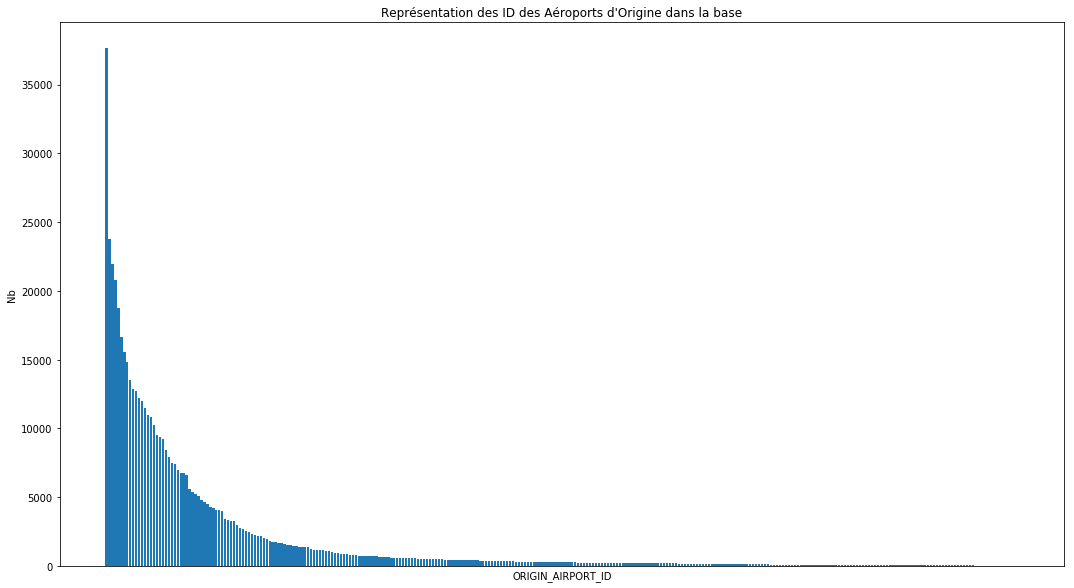

In [118]:
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.set_title("Représentation des ID des Aéroports d'Origine dans la base")
plt.xlabel('ORIGIN_AIRPORT_ID') 
plt.ylabel("Nb") 
plt.xticks([])    

sum_OAI = ORIGIN_AIRPORT_dumm.sum().sort_values(ascending=False)
sum_OAI = pd.DataFrame(sum_OAI)
plt.bar(sum_OAI.index,sum_OAI[0])
plt.show()

In [119]:
sum_OAI.head(5)

,0
Ori_Airp_ID_10397,37644
Ori_Airp_ID_13930,23786
Ori_Airp_ID_11292,21984
Ori_Airp_ID_12892,20775
Ori_Airp_ID_11298,18755


<span style="color:#3366ff"> <strong> Remarque: </strong>L'ID de l'Aéroport d'Origine le plus fréquent dans la base (ID 10397 = ) est présent 39222 fois ce qui ne représente que 7%.

<strong> 1) c) Relation ID Aéroport d'Origine et Retard (recherche des aéroports à problème)

plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée ARR_DELAY en fonction de l'ID de l'Aéroport d'Origine ")
plt.ylabel("Retard à l'arrivée ARR_DELAY")
plt.xlabel("Origin Airport ID")
plt.xticks([]) 

plt.bar(data_plane_raw_1_s['ORIGIN_AIRPORT_ID'], data_plane_raw_1_s['ARR_DELAY'])

plt.show()

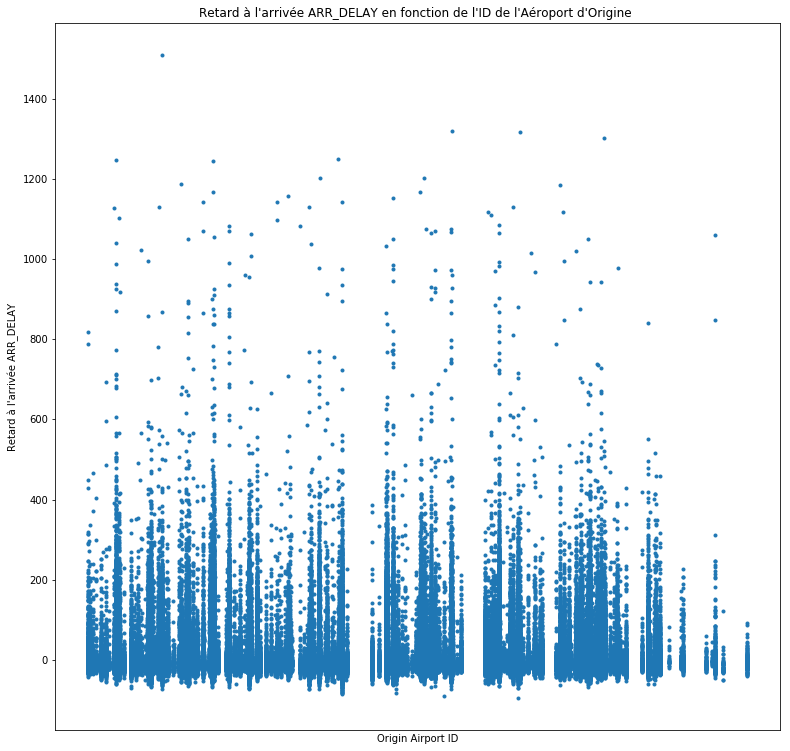

In [121]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée ARR_DELAY en fonction de l'ID de l'Aéroport d'Origine ")
plt.ylabel("Retard à l'arrivée ARR_DELAY")
plt.xlabel("Origin Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['ARR_DELAY'], marker='.')

plt.show()

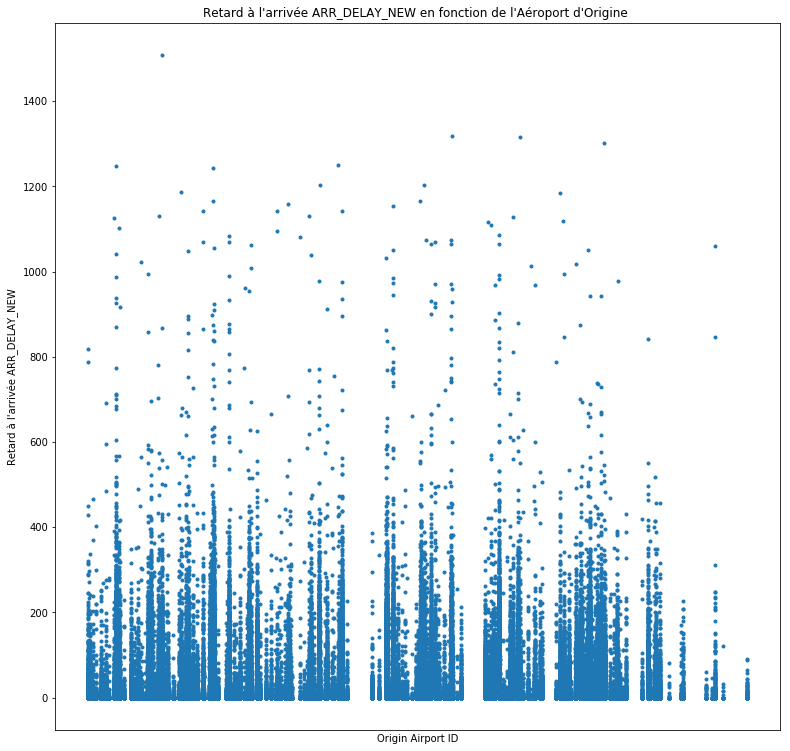

In [122]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée ARR_DELAY_NEW en fonction de l'Aéroport d'Origine ")
plt.ylabel("Retard à l'arrivée ARR_DELAY_NEW")
plt.xlabel("Origin Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['ARR_DELAY_NEW'], marker='.')

plt.show()

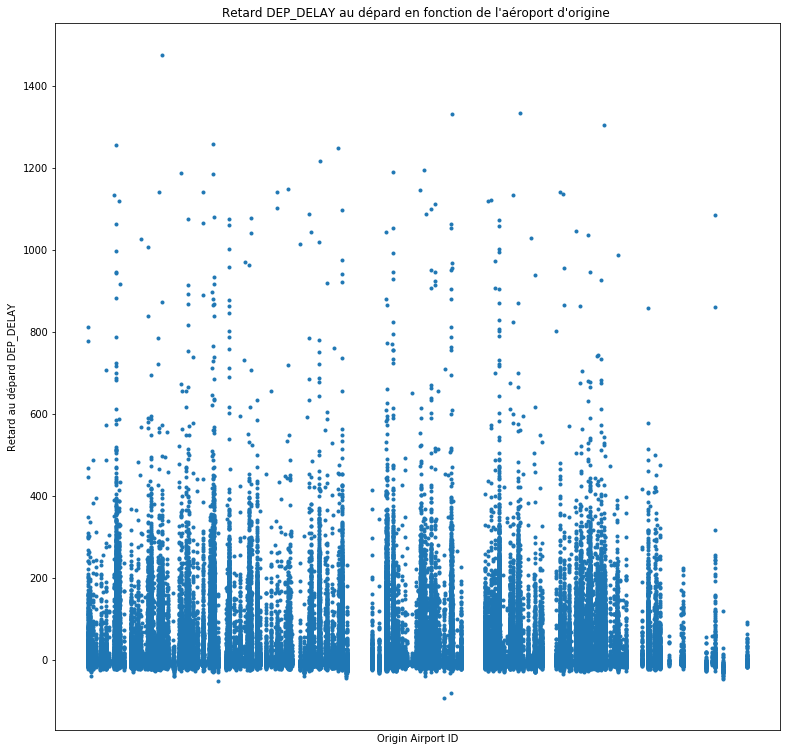

In [123]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard DEP_DELAY au dépard en fonction de l'aéroport d'origine ")
plt.ylabel("Retard au dépard DEP_DELAY")
plt.xlabel("Origin Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['DEP_DELAY'], marker='.')

plt.show()

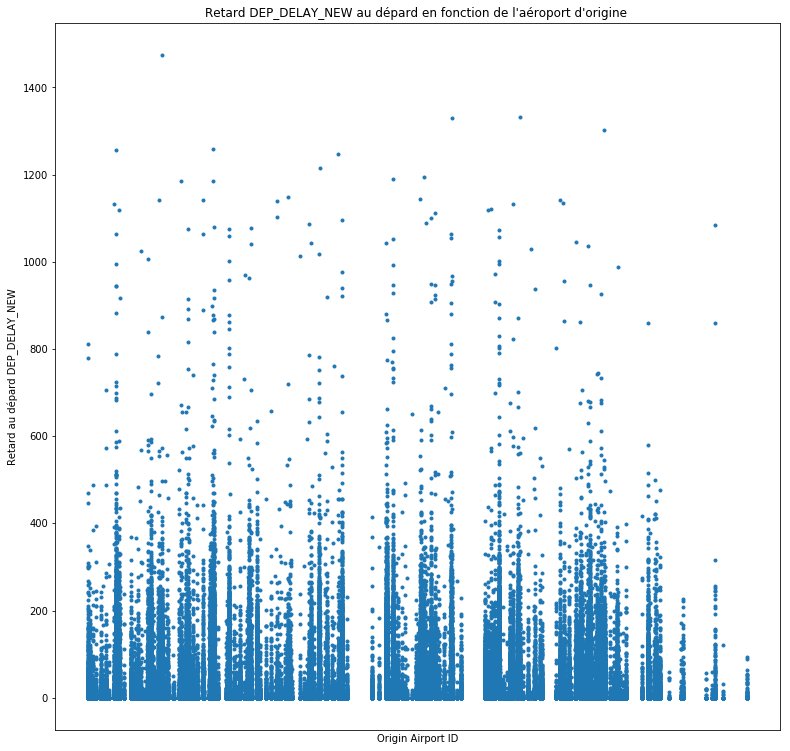

In [124]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard DEP_DELAY_NEW au dépard en fonction de l'aéroport d'origine ")
plt.ylabel("Retard au dépard DEP_DELAY_NEW")
plt.xlabel("Origin Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['DEP_DELAY_NEW'], marker='.')

plt.show()

<span style="color:#3366ff"> <strong> Remarque: </strong> Des Aéroports d'Origine se démarquent de par leurs retards alors que d'autre ne le sont jamais. 

<strong > 2) a) Dummies de DEST_AIRPORT_ID

In [125]:
DEST_AIRPORT_dumm = pd.get_dummies(data_plane_CLEAN_s['DEST_AIRPORT_ID'].astype(str), prefix='Dest_Airp_ID')
DEST_AIRPORT_dumm.head()

,Dest_Airp_ID_10135,Dest_Airp_ID_10136,Dest_Airp_ID_10140,Dest_Airp_ID_10141,Dest_Airp_ID_10146,Dest_Airp_ID_10154,Dest_Airp_ID_10155,Dest_Airp_ID_10157,Dest_Airp_ID_10158,Dest_Airp_ID_10165,Dest_Airp_ID_10170,Dest_Airp_ID_10185,Dest_Airp_ID_10208,Dest_Airp_ID_10245,Dest_Airp_ID_10257,Dest_Airp_ID_10279,Dest_Airp_ID_10299,Dest_Airp_ID_10333,Dest_Airp_ID_10372,Dest_Airp_ID_10397,Dest_Airp_ID_10408,Dest_Airp_ID_10423,Dest_Airp_ID_10431,Dest_Airp_ID_10434,Dest_Airp_ID_10469,Dest_Airp_ID_10529,Dest_Airp_ID_10551,Dest_Airp_ID_10561,Dest_Airp_ID_10577,Dest_Airp_ID_10581,Dest_Airp_ID_10599,Dest_Airp_ID_10620,Dest_Airp_ID_10627,Dest_Airp_ID_10631,Dest_Airp_ID_10666,Dest_Airp_ID_10685,Dest_Airp_ID_10693,Dest_Airp_ID_10713,Dest_Airp_ID_10721,Dest_Airp_ID_10728,Dest_Airp_ID_10731,Dest_Airp_ID_10732,Dest_Airp_ID_10739,Dest_Airp_ID_10747,Dest_Airp_ID_10754,Dest_Airp_ID_10779,Dest_Airp_ID_10781,Dest_Airp_ID_10785,Dest_Airp_ID_10792,Dest_Airp_ID_10800,Dest_Airp_ID_10821,Dest_Airp_ID_10849,Dest_Airp_ID_10868,Dest_Airp_ID_10874,Dest_Airp_ID_10918,Dest_Airp_ID_10926,Dest_Airp_ID_10980,Dest_Airp_ID_10990,Dest_Airp_ID_10994,Dest_Airp_ID_11003,Dest_Airp_ID_11013,Dest_Airp_ID_11042,Dest_Airp_ID_11049,Dest_Airp_ID_11057,Dest_Airp_ID_11066,Dest_Airp_ID_11076,Dest_Airp_ID_11097,Dest_Airp_ID_11109,Dest_Airp_ID_11122,Dest_Airp_ID_11140,Dest_Airp_ID_11146,Dest_Airp_ID_11150,Dest_Airp_ID_11193,Dest_Airp_ID_11203,Dest_Airp_ID_11252,Dest_Airp_ID_11259,Dest_Airp_ID_11267,Dest_Airp_ID_11278,Dest_Airp_ID_11292,Dest_Airp_ID_11298,Dest_Airp_ID_11308,Dest_Airp_ID_11336,Dest_Airp_ID_11337,Dest_Airp_ID_11413,Dest_Airp_ID_11423,Dest_Airp_ID_11433,Dest_Airp_ID_11447,Dest_Airp_ID_11471,Dest_Airp_ID_11481,Dest_Airp_ID_11503,Dest_Airp_ID_11525,Dest_Airp_ID_11537,Dest_Airp_ID_11540,Dest_Airp_ID_11577,Dest_Airp_ID_11587,Dest_Airp_ID_11603,Dest_Airp_ID_11612,Dest_Airp_ID_11617,Dest_Airp_ID_11618,Dest_Airp_ID_11624,Dest_Airp_ID_11630,Dest_Airp_ID_11637,Dest_Airp_ID_11638,Dest_Airp_ID_11641,Dest_Airp_ID_11648,Dest_Airp_ID_11695,Dest_Airp_ID_11697,Dest_Airp_ID_11721,Dest_Airp_ID_11775,Dest_Airp_ID_11778,Dest_Airp_ID_11823,Dest_Airp_ID_11865,Dest_Airp_ID_11867,Dest_Airp_ID_11884,Dest_Airp_ID_11898,Dest_Airp_ID_11905,Dest_Airp_ID_11921,Dest_Airp_ID_11953,Dest_Airp_ID_11973,Dest_Airp_ID_11977,Dest_Airp_ID_11980,Dest_Airp_ID_11982,Dest_Airp_ID_11986,Dest_Airp_ID_11995,Dest_Airp_ID_11996,Dest_Airp_ID_11997,Dest_Airp_ID_12003,Dest_Airp_ID_12007,Dest_Airp_ID_12012,Dest_Airp_ID_12016,Dest_Airp_ID_12094,Dest_Airp_ID_12129,Dest_Airp_ID_12156,Dest_Airp_ID_12173,Dest_Airp_ID_12177,Dest_Airp_ID_12191,Dest_Airp_ID_12197,Dest_Airp_ID_12206,Dest_Airp_ID_12217,Dest_Airp_ID_12250,Dest_Airp_ID_12255,Dest_Airp_ID_12264,Dest_Airp_ID_12265,Dest_Airp_ID_12266,Dest_Airp_ID_12278,Dest_Airp_ID_12280,Dest_Airp_ID_12323,Dest_Airp_ID_12335,Dest_Airp_ID_12339,Dest_Airp_ID_12343,Dest_Airp_ID_12389,Dest_Airp_ID_12391,Dest_Airp_ID_12397,Dest_Airp_ID_12402,Dest_Airp_ID_12441,Dest_Airp_ID_12448,Dest_Airp_ID_12451,Dest_Airp_ID_12478,Dest_Airp_ID_12511,Dest_Airp_ID_12519,Dest_Airp_ID_12523,Dest_Airp_ID_12758,Dest_Airp_ID_12819,Dest_Airp_ID_12884,Dest_Airp_ID_12888,Dest_Airp_ID_12889,Dest_Airp_ID_12891,Dest_Airp_ID_12892,Dest_Airp_ID_12896,Dest_Airp_ID_12898,Dest_Airp_ID_12915,Dest_Airp_ID_12945,Dest_Airp_ID_12951,Dest_Airp_ID_12953,Dest_Airp_ID_12954,Dest_Airp_ID_12982,Dest_Airp_ID_12992,Dest_Airp_ID_13029,Dest_Airp_ID_13061,Dest_Airp_ID_13076,Dest_Airp_ID_13127,Dest_Airp_ID_13158,Dest_Airp_ID_13184,Dest_Airp_ID_13198,Dest_Airp_ID_13204,Dest_Airp_ID_13230,Dest_Airp_ID_13232,Dest_Airp_ID_13241,Dest_Airp_ID_13244,Dest_Airp_ID_13256,Dest_Airp_ID_13264,Dest_Airp_ID_13277,Dest_Airp_ID_13296,Dest_Airp_ID_13303,Dest_Airp_ID_13342,Dest_Airp_ID_13344,Dest_Airp_ID_13360,Dest_Airp_ID_13367,Dest_Airp_ID_13377,Dest_Airp_ID_13388,Dest_Airp_ID_13422,Dest_Airp_ID_13433,Dest_Airp_ID_13459,Dest_Airp_ID_13476,Dest_Airp_ID_13485,Dest_Airp_ID_13486,Dest_Airp_ID_13487,Dest_Airp_ID_13495,Dest_Airp_ID_13502,Dest_Airp_ID_13541,Dest_Airp

In [126]:
shape = DEST_AIRPORT_dumm.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 308 paramètres.


<strong> 2) b) Analyse fréquentielle ID des Aéroports de Destination

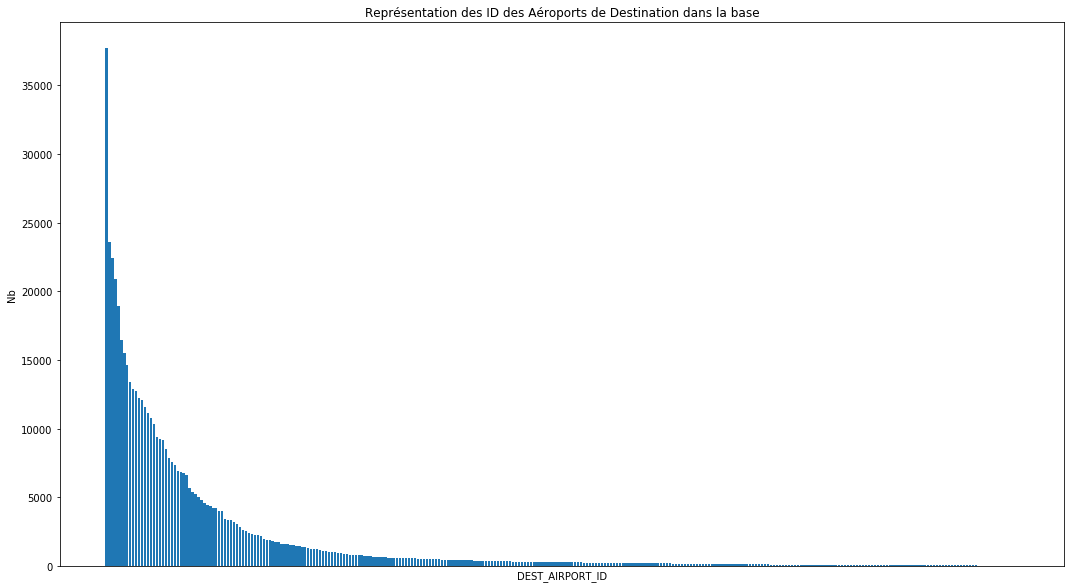

In [127]:
plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.set_title("Représentation des ID des Aéroports de Destination dans la base")
plt.xlabel('DEST_AIRPORT_ID') 
plt.ylabel("Nb") 
plt.xticks([])   

sum_DAI = DEST_AIRPORT_dumm.sum().sort_values(ascending=False)
sum_DAI = pd.DataFrame(sum_DAI)
plt.bar(sum_DAI.index,sum_DAI[0])
plt.show()

In [128]:
sum_DAI.head(5)

,0
Dest_Airp_ID_10397,37709
Dest_Airp_ID_13930,23604
Dest_Airp_ID_11292,22415
Dest_Airp_ID_12892,20861
Dest_Airp_ID_11298,18934


<span style="color:#3366ff"> <strong> Remarque: </strong>L'ID de l'Aéroport de Destination le plus fréquent dans la base (ID 10397 = ) est présent 39097 fois ce qui ne représente que %.

<strong> 2) c) Relation ID Aéroport de Destination et Retard (recherche des aéroports à problème)

plt.figure(figsize=(13,13))

ax = plt.subplot() 
ax.set_title("Retard à l'arrivée ARR_DELAY en fonction de l'aéroport de destination ") 
plt.ylabel("Retard à l'arrivée ARR_DELAY") 
plt.xlabel("Destination Airport ID") 
plt.xticks([])

plt.bar(data_plane_raw_1_s['DEST_AIRPORT_ID'], data_plane_raw_1_s['ARR_DELAY'])

plt.show()

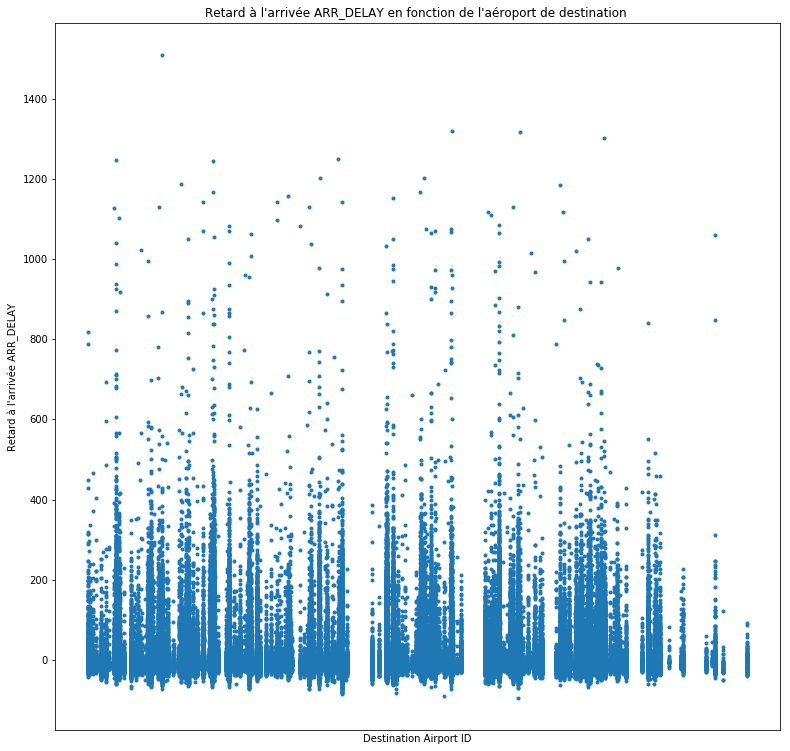

In [129]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée ARR_DELAY en fonction de l'aéroport de destination ")
plt.ylabel("Retard à l'arrivée ARR_DELAY")
plt.xlabel("Destination Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['ARR_DELAY'], marker='.' )

plt.show()

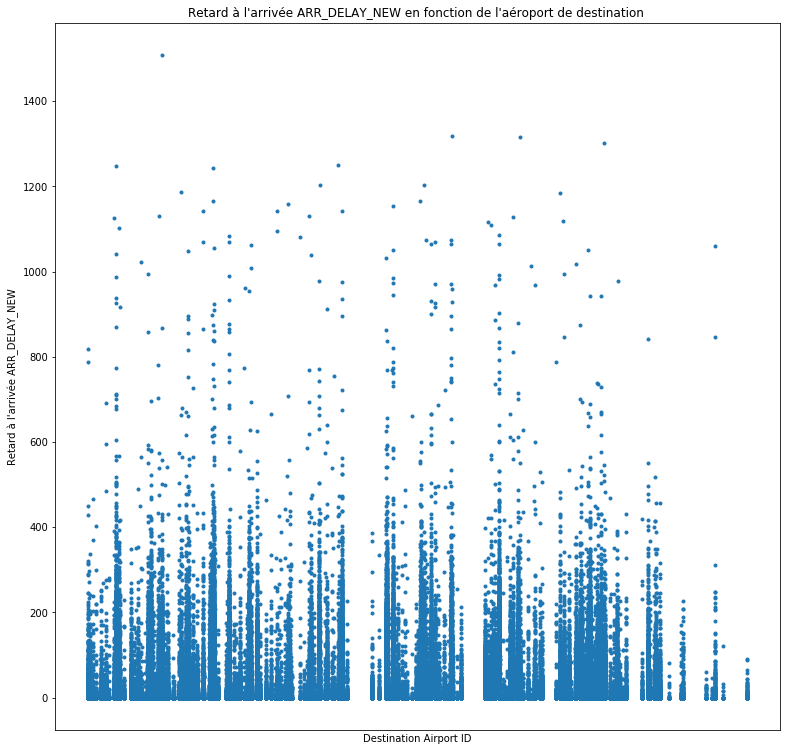

In [130]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée ARR_DELAY_NEW en fonction de l'aéroport de destination ")
plt.ylabel("Retard à l'arrivée ARR_DELAY_NEW")
plt.xlabel("Destination Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['ARR_DELAY_NEW'], marker='.')

plt.show()

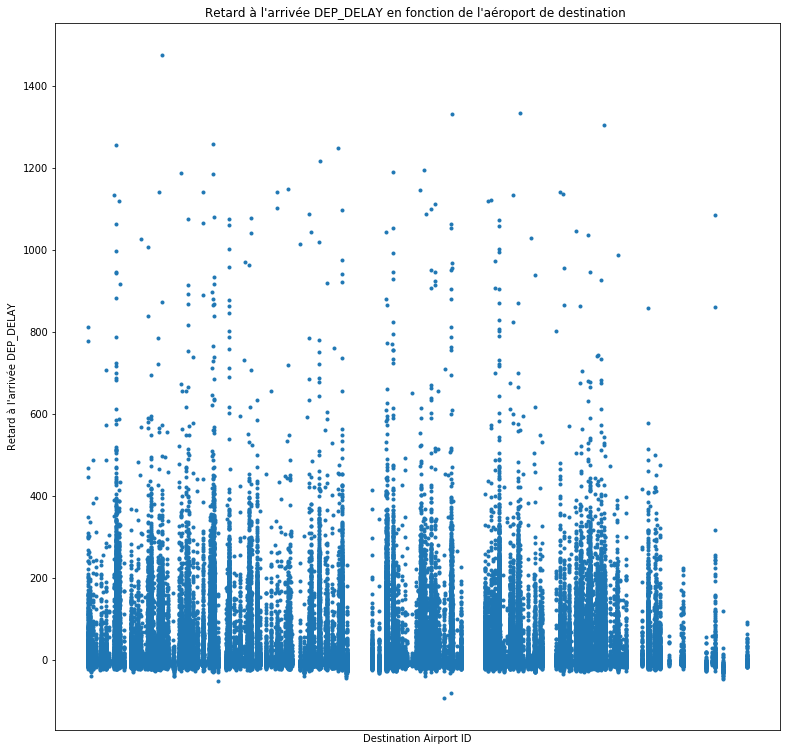

In [131]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée DEP_DELAY en fonction de l'aéroport de destination ")
plt.ylabel("Retard à l'arrivée DEP_DELAY")
plt.xlabel("Destination Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['DEP_DELAY'], marker='.')

plt.show()

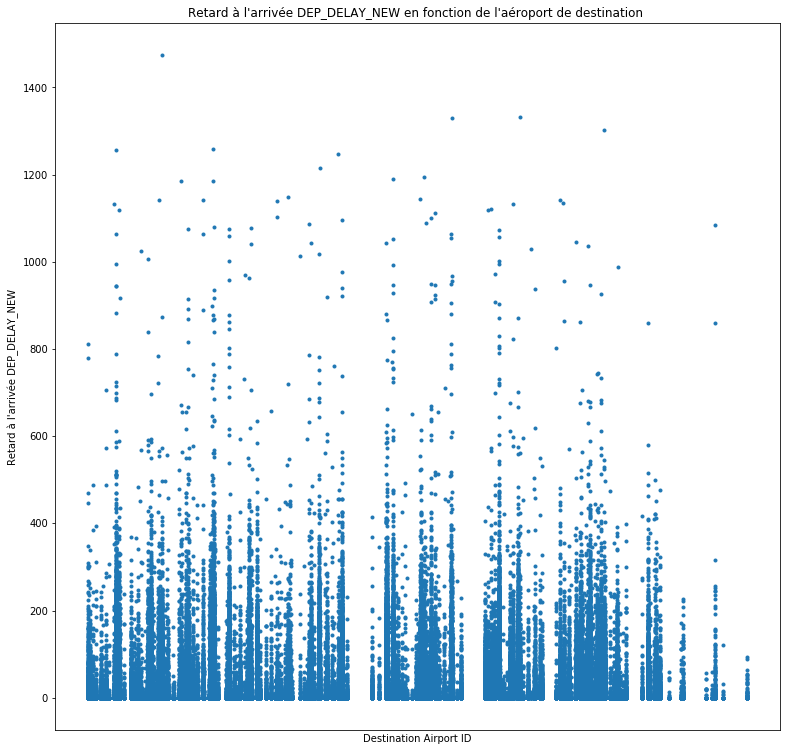

In [132]:
plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title("Retard à l'arrivée DEP_DELAY_NEW en fonction de l'aéroport de destination ")
plt.ylabel("Retard à l'arrivée DEP_DELAY_NEW")
plt.xlabel("Destination Airport ID")
plt.xticks([]) 

plt.scatter(data_plane_CLEAN_s['ORIGIN_AIRPORT_ID'], data_plane_CLEAN_s['DEP_DELAY_NEW'], marker='.')

plt.show()

<span style="color:#3366ff"> <strong> Remarque: </strong> Des Aéroports de Destination se démarquent de par leurs retards alors que d'autre ne le sont jamais. 

<strong> 3) Conservation des ID des aéroports d'Origine et de Destination les plus présents dans la base.

In [133]:
# Conservation de ID présents au moins 500 fois.
sum_OAI_s = sum_OAI>500
sum_OAI_s.head()

,0
Ori_Airp_ID_10397,True
Ori_Airp_ID_13930,True
Ori_Airp_ID_11292,True
Ori_Airp_ID_12892,True
Ori_Airp_ID_11298,True


In [134]:
sum_OAI_s.tail()

,0
Ori_Airp_ID_12250,False
Ori_Airp_ID_10245,False
Ori_Airp_ID_13388,False
Ori_Airp_ID_11997,False
Ori_Airp_ID_14082,False


In [135]:
sum_OAI_s.describe()

,0
count,308
unique,2
top,False
freq,201


In [136]:
sum_OAI_s = sum_OAI_s[sum_OAI_s[0]==True]

In [137]:
sum_OAI_s.index

Index(['Ori_Airp_ID_10397', 'Ori_Airp_ID_13930', 'Ori_Airp_ID_11292',
       'Ori_Airp_ID_12892', 'Ori_Airp_ID_11298', 'Ori_Airp_ID_14771',
       'Ori_Airp_ID_14107', 'Ori_Airp_ID_12889', 'Ori_Airp_ID_12266',
       'Ori_Airp_ID_13487',
       ...
       'Ori_Airp_ID_11995', 'Ori_Airp_ID_14814', 'Ori_Airp_ID_14193',
       'Ori_Airp_ID_12402', 'Ori_Airp_ID_13577', 'Ori_Airp_ID_15919',
       'Ori_Airp_ID_13158', 'Ori_Airp_ID_15096', 'Ori_Airp_ID_14696',
       'Ori_Airp_ID_10874'],
      dtype='object', length=107)

In [138]:
ORIGIN_AIRPORT_dumm_OK = ORIGIN_AIRPORT_dumm.filter(items=(sum_OAI_s.index))
ORIGIN_AIRPORT_dumm_OK.head()

,Ori_Airp_ID_10397,Ori_Airp_ID_13930,Ori_Airp_ID_11292,Ori_Airp_ID_12892,Ori_Airp_ID_11298,Ori_Airp_ID_14771,Ori_Airp_ID_14107,Ori_Airp_ID_12889,Ori_Airp_ID_12266,Ori_Airp_ID_13487,Ori_Airp_ID_14747,Ori_Airp_ID_11433,Ori_Airp_ID_13204,Ori_Airp_ID_10721,Ori_Airp_ID_11618,Ori_Airp_ID_14869,Ori_Airp_ID_11057,Ori_Airp_ID_10821,Ori_Airp_ID_12953,Ori_Airp_ID_12478,Ori_Airp_ID_13232,Ori_Airp_ID_11697,Ori_Airp_ID_14679,Ori_Airp_ID_11278,Ori_Airp_ID_14100,Ori_Airp_ID_11259,Ori_Airp_ID_13303,Ori_Airp_ID_15304,Ori_Airp_ID_14057,Ori_Airp_ID_15016,Ori_Airp_ID_12191,Ori_Airp_ID_10693,Ori_Airp_ID_13796,Ori_Airp_ID_12173,Ori_Airp_ID_10423,Ori_Airp_ID_13198,Ori_Airp_ID_13495,Ori_Airp_ID_14908,Ori_Airp_ID_14893,Ori_Airp_ID_14831,Ori_Airp_ID_12264,Ori_Airp_ID_14492,Ori_Airp_ID_11042,Ori_Airp_ID_13342,Ori_Airp_ID_14683,Ori_Airp_ID_14635,Ori_Airp_ID_12339,Ori_Airp_ID_14843,Ori_Airp_ID_14122,Ori_Airp_ID_14027,Ori_Airp_ID_13830,Ori_Airp_ID_10800,Ori_Airp_ID_11066,Ori_Airp_ID_10529,Ori_Airp_ID_13891,Ori_Airp_ID_13871,Ori_Airp_ID_12451,Ori_Airp_ID_10140,Ori_Airp_ID_10792,Ori_Airp_ID_10299,Ori_Airp_ID_15376,Ori_Airp_ID_13851,Ori_Airp_ID_14524,Ori_Airp_ID_11193,Ori_Airp_ID_10713,Ori_Airp_ID_13244,Ori_Airp_ID_10994,Ori_Airp_ID_14570,Ori_Airp_ID_15370,Ori_Airp_ID_14307,Ori_Airp_ID_12758,Ori_Airp_ID_11540,Ori_Airp_ID_12982,Ori_Airp_ID_10599,Ori_Airp_ID_12954,Ori_Airp_ID_13931,Ori_Airp_ID_11884,Ori_Airp_ID_14262,Ori_Airp_ID_14730,Ori_Airp_ID_11986,Ori_Airp_ID_10257,Ori_Airp_ID_11109,Ori_Airp_ID_11638,Ori_Airp_ID_12992,Ori_Airp_ID_11423,Ori_Airp_ID_13485,Ori_Airp_ID_11996,Ori_Airp_ID_12278,Ori_Airp_ID_14576,Ori_Airp_ID_15412,Ori_Airp_ID_14685,Ori_Airp_ID_10781,Ori_Airp_ID_12197,Ori_Airp_ID_14321,Ori_Airp_ID_13296,Ori_Airp_ID_11267,Ori_Airp_ID_14689,Ori_Airp_ID_11995,Ori_Airp_ID_14814,Ori_Airp_ID_14193,Ori_Airp_ID_12402,Ori_Airp_ID_13577,Ori_Airp_ID_15919,Ori_Airp_ID_13158,Ori_Airp_ID_15096,Ori_Airp_ID_14696,Ori_Airp_ID_10874
253891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76970,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
411881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
430592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
shape = ORIGIN_AIRPORT_dumm_OK.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 107 paramètres.


In [140]:
# Conservation de ID présents au moins 500 fois.
sum_DAI_s = sum_DAI>500
sum_DAI_s.head()

,0
Dest_Airp_ID_10397,True
Dest_Airp_ID_13930,True
Dest_Airp_ID_11292,True
Dest_Airp_ID_12892,True
Dest_Airp_ID_11298,True


In [141]:
sum_DAI_s =sum_DAI_s[sum_DAI_s[0]==True]

In [142]:
sum_DAI_s.index

Index(['Dest_Airp_ID_10397', 'Dest_Airp_ID_13930', 'Dest_Airp_ID_11292',
       'Dest_Airp_ID_12892', 'Dest_Airp_ID_11298', 'Dest_Airp_ID_14771',
       'Dest_Airp_ID_14107', 'Dest_Airp_ID_12889', 'Dest_Airp_ID_12266',
       'Dest_Airp_ID_14747',
       ...
       'Dest_Airp_ID_15096', 'Dest_Airp_ID_13158', 'Dest_Airp_ID_15919',
       'Dest_Airp_ID_13577', 'Dest_Airp_ID_11995', 'Dest_Airp_ID_14689',
       'Dest_Airp_ID_14814', 'Dest_Airp_ID_14696', 'Dest_Airp_ID_15024',
       'Dest_Airp_ID_12448'],
      dtype='object', length=108)

In [143]:
DEST_AIRPORT_dumm_OK = DEST_AIRPORT_dumm.filter(items=(sum_DAI_s.index))
DEST_AIRPORT_dumm_OK.head()

,Dest_Airp_ID_10397,Dest_Airp_ID_13930,Dest_Airp_ID_11292,Dest_Airp_ID_12892,Dest_Airp_ID_11298,Dest_Airp_ID_14771,Dest_Airp_ID_14107,Dest_Airp_ID_12889,Dest_Airp_ID_12266,Dest_Airp_ID_14747,Dest_Airp_ID_13487,Dest_Airp_ID_11433,Dest_Airp_ID_13204,Dest_Airp_ID_10721,Dest_Airp_ID_11618,Dest_Airp_ID_14869,Dest_Airp_ID_11057,Dest_Airp_ID_10821,Dest_Airp_ID_12478,Dest_Airp_ID_12953,Dest_Airp_ID_13232,Dest_Airp_ID_11697,Dest_Airp_ID_14679,Dest_Airp_ID_11278,Dest_Airp_ID_14100,Dest_Airp_ID_11259,Dest_Airp_ID_13303,Dest_Airp_ID_15304,Dest_Airp_ID_14057,Dest_Airp_ID_15016,Dest_Airp_ID_12191,Dest_Airp_ID_10693,Dest_Airp_ID_13796,Dest_Airp_ID_12173,Dest_Airp_ID_10423,Dest_Airp_ID_13198,Dest_Airp_ID_13495,Dest_Airp_ID_14908,Dest_Airp_ID_14831,Dest_Airp_ID_14893,Dest_Airp_ID_12264,Dest_Airp_ID_14492,Dest_Airp_ID_11042,Dest_Airp_ID_13342,Dest_Airp_ID_14683,Dest_Airp_ID_14635,Dest_Airp_ID_12339,Dest_Airp_ID_14843,Dest_Airp_ID_14122,Dest_Airp_ID_14027,Dest_Airp_ID_13830,Dest_Airp_ID_11066,Dest_Airp_ID_10800,Dest_Airp_ID_13891,Dest_Airp_ID_10529,Dest_Airp_ID_10140,Dest_Airp_ID_12451,Dest_Airp_ID_10792,Dest_Airp_ID_13871,Dest_Airp_ID_10299,Dest_Airp_ID_11193,Dest_Airp_ID_10713,Dest_Airp_ID_15376,Dest_Airp_ID_14524,Dest_Airp_ID_13851,Dest_Airp_ID_10994,Dest_Airp_ID_15370,Dest_Airp_ID_14570,Dest_Airp_ID_13244,Dest_Airp_ID_14307,Dest_Airp_ID_10599,Dest_Airp_ID_12758,Dest_Airp_ID_12982,Dest_Airp_ID_13931,Dest_Airp_ID_11540,Dest_Airp_ID_12954,Dest_Airp_ID_14730,Dest_Airp_ID_14262,Dest_Airp_ID_11884,Dest_Airp_ID_10257,Dest_Airp_ID_11986,Dest_Airp_ID_11109,Dest_Airp_ID_12278,Dest_Airp_ID_12992,Dest_Airp_ID_11638,Dest_Airp_ID_13485,Dest_Airp_ID_11996,Dest_Airp_ID_11423,Dest_Airp_ID_14685,Dest_Airp_ID_15412,Dest_Airp_ID_10781,Dest_Airp_ID_14576,Dest_Airp_ID_13296,Dest_Airp_ID_12197,Dest_Airp_ID_11267,Dest_Airp_ID_14193,Dest_Airp_ID_14321,Dest_Airp_ID_12402,Dest_Airp_ID_15096,Dest_Airp_ID_13158,Dest_Airp_ID_15919,Dest_Airp_ID_13577,Dest_Airp_ID_11995,Dest_Airp_ID_14689,Dest_Airp_ID_14814,Dest_Airp_ID_14696,Dest_Airp_ID_15024,Dest_Airp_ID_12448
253891,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76970,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
411881,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
430592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
shape = DEST_AIRPORT_dumm_OK.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 108 paramètres.


In [145]:
data_plane_dumm = pd.concat([ORIGIN_AIRPORT_dumm_OK, DEST_AIRPORT_dumm_OK], axis=1)

shape = data_plane_dumm.shape

print("Cette base de ID AIRPORT dummies contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de ID AIRPORT dummies contient 545017 vols décrits avec 215 paramètres.


## PCA : Réduction de dimension des 215 "Airport ID dummies"

In [146]:
# preprocessing
data_plane_dumm_prepro = preprocessing.scale(data_plane_dumm)

pca = decomposition.PCA(n_components=2)
pca.fit(data_plane_dumm_prepro)
print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.00774367 0.01481532]


In [147]:
data_plane_dumm_prepro_trans= pca.transform(data_plane_dumm_prepro)

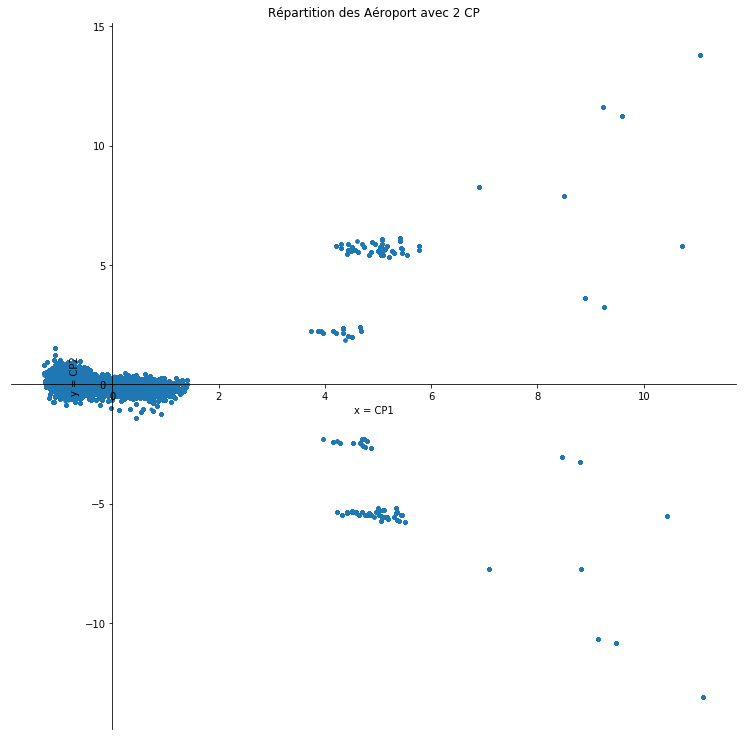

In [148]:
fig = plt.figure(figsize=(13,13))

ax = plt.subplot()
ax.set_title('Répartition des Aéroport avec 2 CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_plane_dumm_prepro_trans[:,0], data_plane_dumm_prepro_trans[:,1], marker='.')

(-0.6, 0.6)

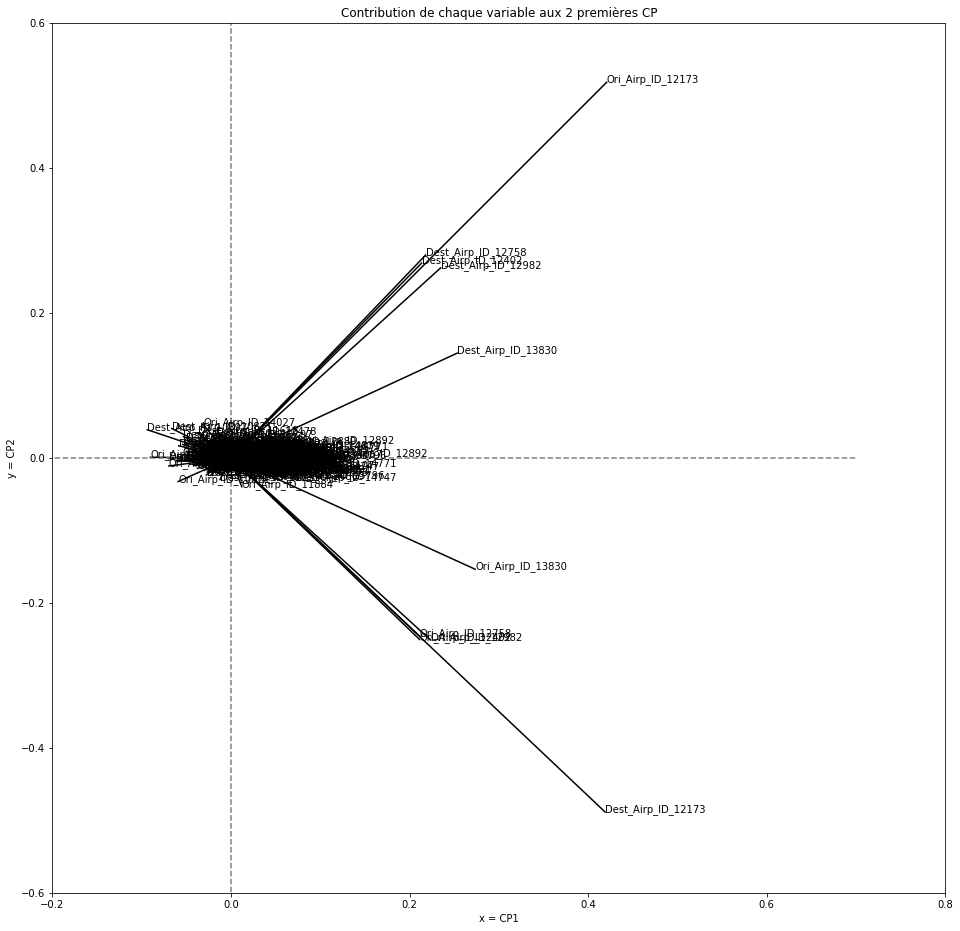

In [287]:
pcs = pca.components_

fig = plt.figure(figsize=(16,16))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data_plane_dumm.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.2, 0.8])
plt.ylim([-0.6, 0.6])

<span style="color:#3366ff"> <strong> Conclusion: </strong> Certains aéroports se démarquent après PCA, dans la partie droite de la représentation. 

In [150]:
PCA_id_airport_X = pd.DataFrame(pcs, columns =[data_plane_dumm.columns])

In [151]:
PCA_id_airport_X

,Ori_Airp_ID_10397,Ori_Airp_ID_13930,Ori_Airp_ID_11292,Ori_Airp_ID_12892,Ori_Airp_ID_11298,Ori_Airp_ID_14771,Ori_Airp_ID_14107,Ori_Airp_ID_12889,Ori_Airp_ID_12266,Ori_Airp_ID_13487,Ori_Airp_ID_14747,Ori_Airp_ID_11433,Ori_Airp_ID_13204,Ori_Airp_ID_10721,Ori_Airp_ID_11618,Ori_Airp_ID_14869,Ori_Airp_ID_11057,Ori_Airp_ID_10821,Ori_Airp_ID_12953,Ori_Airp_ID_12478,Ori_Airp_ID_13232,Ori_Airp_ID_11697,Ori_Airp_ID_14679,Ori_Airp_ID_11278,Ori_Airp_ID_14100,Ori_Airp_ID_11259,Ori_Airp_ID_13303,Ori_Airp_ID_15304,Ori_Airp_ID_14057,Ori_Airp_ID_15016,Ori_Airp_ID_12191,Ori_Airp_ID_10693,Ori_Airp_ID_13796,Ori_Airp_ID_12173,Ori_Airp_ID_10423,Ori_Airp_ID_13198,Ori_Airp_ID_13495,Ori_Airp_ID_14908,Ori_Airp_ID_14893,Ori_Airp_ID_14831,Ori_Airp_ID_12264,Ori_Airp_ID_14492,Ori_Airp_ID_11042,Ori_Airp_ID_13342,Ori_Airp_ID_14683,Ori_Airp_ID_14635,Ori_Airp_ID_12339,Ori_Airp_ID_14843,Ori_Airp_ID_14122,Ori_Airp_ID_14027,Ori_Airp_ID_13830,Ori_Airp_ID_10800,Ori_Airp_ID_11066,Ori_Airp_ID_10529,Ori_Airp_ID_13891,Ori_Airp_ID_13871,Ori_Airp_ID_12451,Ori_Airp_ID_10140,Ori_Airp_ID_10792,Ori_Airp_ID_10299,Ori_Airp_ID_15376,Ori_Airp_ID_13851,Ori_Airp_ID_14524,Ori_Airp_ID_11193,Ori_Airp_ID_10713,Ori_Airp_ID_13244,Ori_Airp_ID_10994,Ori_Airp_ID_14570,Ori_Airp_ID_15370,Ori_Airp_ID_14307,Ori_Airp_ID_12758,Ori_Airp_ID_11540,Ori_Airp_ID_12982,Ori_Airp_ID_10599,Ori_Airp_ID_12954,Ori_Airp_ID_13931,Ori_Airp_ID_11884,Ori_Airp_ID_14262,Ori_Airp_ID_14730,Ori_Airp_ID_11986,Ori_Airp_ID_10257,Ori_Airp_ID_11109,Ori_Airp_ID_11638,Ori_Airp_ID_12992,Ori_Airp_ID_11423,Ori_Airp_ID_13485,Ori_Airp_ID_11996,Ori_Airp_ID_12278,Ori_Airp_ID_14576,Ori_Airp_ID_15412,Ori_Airp_ID_14685,Ori_Airp_ID_10781,Ori_Airp_ID_12197,Ori_Airp_ID_14321,Ori_Airp_ID_13296,Ori_Airp_ID_11267,Ori_Airp_ID_14689,Ori_Airp_ID_11995,Ori_Airp_ID_14814,Ori_Airp_ID_14193,Ori_Airp_ID_12402,Ori_Airp_ID_13577,Ori_Airp_ID_15919,Ori_Airp_ID_13158,Ori_Airp_ID_15096,Ori_Airp_ID_14696,Ori_Airp_ID_10874,Dest_Airp_ID_10397,Dest_Airp_ID_13930,Dest_Airp_ID_11292,Dest_Airp_ID_12892,Dest_Airp_ID_11298,Dest_Airp_ID_14771,Dest_Airp_ID_14107,Dest_Airp_ID_12889,Dest_Airp_ID_12266,Dest_Airp_ID_14747,Dest_Airp_ID_13487,Dest_Airp_ID_11433,Dest_Airp_ID_13204,Dest_Airp_ID_10721,Dest_Airp_ID_11618,Dest_Airp_ID_14869,Dest_Airp_ID_11057,Dest_Airp_ID_10821,Dest_Airp_ID_12478,Dest_Airp_ID_12953,Dest_Airp_ID_13232,Dest_Airp_ID_11697,Dest_Airp_ID_14679,Dest_Airp_ID_11278,Dest_Airp_ID_14100,Dest_Airp_ID_11259,Dest_Airp_ID_13303,Dest_Airp_ID_15304,Dest_Airp_ID_14057,Dest_Airp_ID_15016,Dest_Airp_ID_12191,Dest_Airp_ID_10693,Dest_Airp_ID_13796,Dest_Airp_ID_12173,Dest_Airp_ID_10423,Dest_Airp_ID_13198,Dest_Airp_ID_13495,Dest_Airp_ID_14908,Dest_Airp_ID_14831,Dest_Airp_ID_14893,Dest_Airp_ID_12264,Dest_Airp_ID_14492,Dest_Airp_ID_11042,Dest_Airp_ID_13342,Dest_Airp_ID_14683,Dest_Airp_ID_14635,Dest_Airp_ID_12339,Dest_Airp_ID_14843,Dest_Airp_ID_14122,Dest_Airp_ID_14027,Dest_Airp_ID_13830,Dest_Airp_ID_11066,Dest_Airp_ID_10800,Dest_Airp_ID_13891,Dest_Airp_ID_10529,Dest_Airp_ID_10140,Dest_Airp_ID_12451,Dest_Airp_ID_10792,Dest_Airp_ID_13871,Dest_Airp_ID_10299,Dest_Airp_ID_11193,Dest_Airp_ID_10713,Dest_Airp_ID_15376,Dest_Airp_ID_14524,Dest_Airp_ID_13851,Dest_Airp_ID_10994,Dest_Airp_ID_15370,Dest_Airp_ID_14570,Dest_Airp_ID_13244,Dest_Airp_ID_14307,Dest_Airp_ID_10599,Dest_Airp_ID_12758,Dest_Airp_ID_12982,Dest_Airp_ID_13931,Dest_Airp_ID_11540,Dest_Airp_ID_12954,Dest_Airp_ID_14730,Dest_Airp_ID_14262,Dest_Airp_ID_11884,Dest_Airp_ID_10257,Dest_Airp_ID_11986,Dest_Airp_ID_11109,Dest_Airp_ID_12278,Dest_Airp_ID_12992,Dest_Airp_ID_11638,Dest_Airp_ID_13485,Dest_Airp_ID_11996,Dest_Airp_ID_11423,Dest_Airp_ID_14685,Dest_Airp_ID_15412,Dest_Airp_ID_10781,Dest_Airp_ID_14576,Dest_Airp_ID_13296,Dest_Airp_ID_12197,Dest_Airp_ID_11267,Dest_Airp_ID_14193,Dest_Airp_ID_14321,Dest_Airp_ID_12402,Dest_Airp_ID_15096,Dest_Airp_ID_13158,Dest_Airp_ID_15919,Dest_Airp_ID_13577,Dest_Airp_ID_11995,Dest_Airp_ID_14689,Dest_Airp_ID_14814,Dest_Airp_ID_14696,Dest_Airp_ID_15024,Dest_Airp_ID_12448
0,-0.090498,-0.035401

In [152]:
PCA_id_airport_ = PCA_id_airport_X.loc[0].sort_values(ascending=False)
PCA_id_airport_.head(20)

Ori_Airp_ID_12173     0.420856
Dest_Airp_ID_12173    0.418924
Ori_Airp_ID_13830     0.273430
Dest_Airp_ID_13830    0.253278
Dest_Airp_ID_12982    0.234818
Ori_Airp_ID_12982     0.223606
Dest_Airp_ID_12758    0.218013
Dest_Airp_ID_12402    0.213468
Ori_Airp_ID_12758     0.211415
Ori_Airp_ID_12402     0.211290
Dest_Airp_ID_12892    0.107786
Ori_Airp_ID_12892     0.079716
Ori_Airp_ID_14771     0.073461
Dest_Airp_ID_14747    0.072902
Dest_Airp_ID_14771    0.072669
Ori_Airp_ID_13796     0.070888
Ori_Airp_ID_14831     0.064127
Ori_Airp_ID_14747     0.063772
Dest_Airp_ID_13796    0.059009
Dest_Airp_ID_14057    0.057574
Name: 0, dtype: float64

In [153]:
PCA_id_airport_ = PCA_id_airport_>0.2
PCA_id_airport_.head(10)

Ori_Airp_ID_12173     True
Dest_Airp_ID_12173    True
Ori_Airp_ID_13830     True
Dest_Airp_ID_13830    True
Dest_Airp_ID_12982    True
Ori_Airp_ID_12982     True
Dest_Airp_ID_12758    True
Dest_Airp_ID_12402    True
Ori_Airp_ID_12758     True
Ori_Airp_ID_12402     True
Name: 0, dtype: bool

In [154]:
PCA_id_airport_ = PCA_id_airport_[PCA_id_airport_ == True]
PCA_id_airport_

Ori_Airp_ID_12173     True
Dest_Airp_ID_12173    True
Ori_Airp_ID_13830     True
Dest_Airp_ID_13830    True
Dest_Airp_ID_12982    True
Ori_Airp_ID_12982     True
Dest_Airp_ID_12758    True
Dest_Airp_ID_12402    True
Ori_Airp_ID_12758     True
Ori_Airp_ID_12402     True
Name: 0, dtype: bool

In [155]:
PCA_id_airport_.index.get_level_values(0)

Index(['Ori_Airp_ID_12173', 'Dest_Airp_ID_12173', 'Ori_Airp_ID_13830',
       'Dest_Airp_ID_13830', 'Dest_Airp_ID_12982', 'Ori_Airp_ID_12982',
       'Dest_Airp_ID_12758', 'Dest_Airp_ID_12402', 'Ori_Airp_ID_12758',
       'Ori_Airp_ID_12402'],
      dtype='object')

In [156]:
ID_AIRPORT_ = data_plane_dumm.filter(items=(PCA_id_airport_.index.get_level_values(0)))
ID_AIRPORT_.head()

,Ori_Airp_ID_12173,Dest_Airp_ID_12173,Ori_Airp_ID_13830,Dest_Airp_ID_13830,Dest_Airp_ID_12982,Ori_Airp_ID_12982,Dest_Airp_ID_12758,Dest_Airp_ID_12402,Ori_Airp_ID_12758,Ori_Airp_ID_12402
253891,0,0,0,0,0,0,0,0,0,0
76970,0,0,0,0,0,0,0,0,0,0
411881,0,0,0,0,0,0,0,0,0,0
430592,0,0,0,0,0,0,0,0,0,0
102107,0,0,0,0,0,0,0,0,0,0


In [157]:
ID_AIRPORT_.shape

(545017, 10)

<strong> Quali / Quanti: DISTANCE / ID Origin Aiport

Dest_Airp_ID_12173 / DISTANCE

In [158]:
data_plane_ID_AIRPORT_1 = pd.concat([data_plane_CLEAN_s['DISTANCE'], ID_AIRPORT_], axis=1)

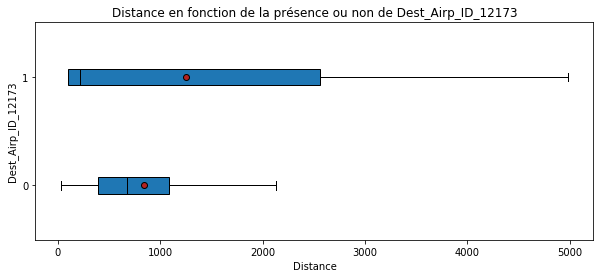

In [159]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Distance')
plt.ylabel("Dest_Airp_ID_12173")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Dest_Airp_ID_12173']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Corrélation forte

Ori_Airp_ID_12173 / DISTANCE	

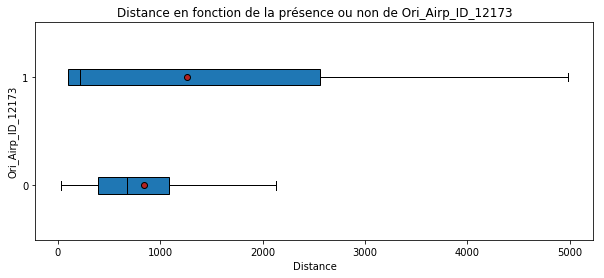

In [160]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Distance')
plt.ylabel("Ori_Airp_ID_12173")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Ori_Airp_ID_12173']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Corrélation forte

Ori_Airp_ID_13830 / DISTANCE	

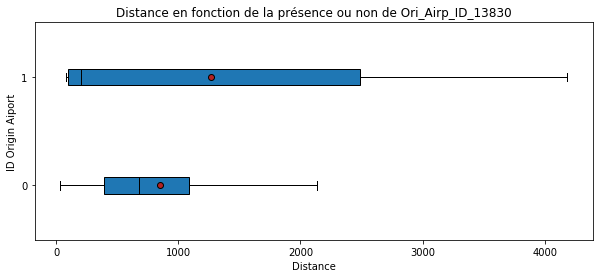

In [161]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Ori_Airp_ID_13830']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Corrélation forte

Ori_Airp_ID_12758 / DISTANCE

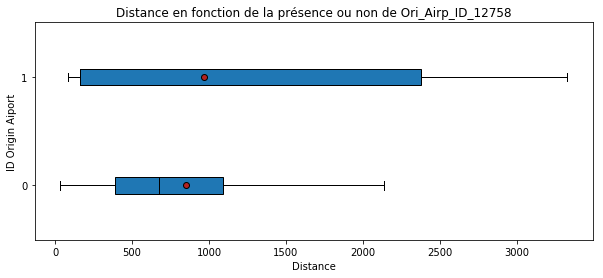

In [162]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Ori_Airp_ID_12758']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Corrélation forte

Ori_Airp_ID_12982 / DISTANCE

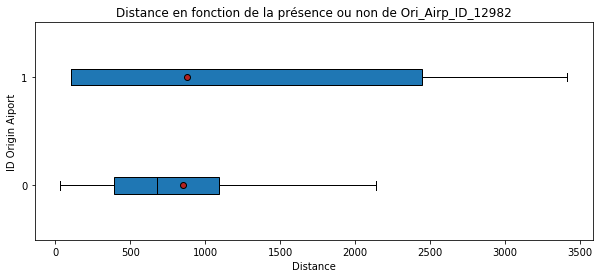

In [163]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Ori_Airp_ID_12982']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Corrélation forte

Dest_Airp_ID_13830 / DISTANCE

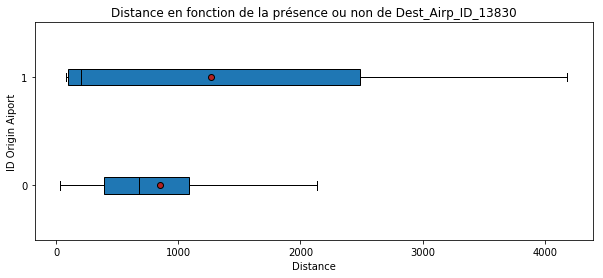

In [164]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Dest_Airp_ID_13830']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Corrélation forte

Ori_Airp_ID_12402 / DISTANCE

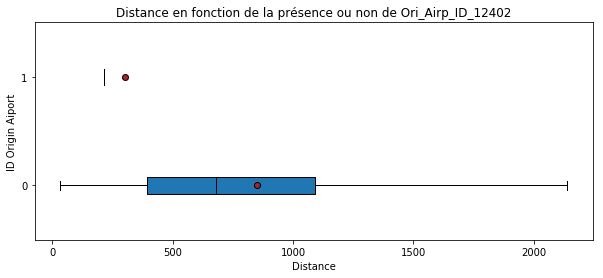

In [165]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Ori_Airp_ID_12402']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Dest_Airp_ID_12758 / DISTANCE

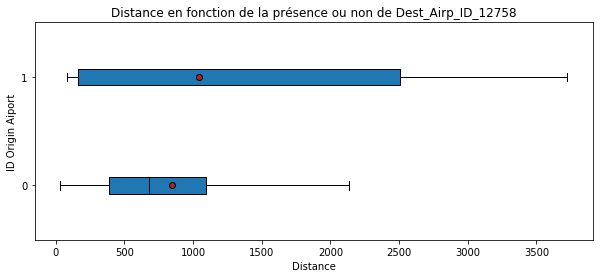

In [166]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Dest_Airp_ID_12758')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Dest_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Dest_Airp_ID_12758']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Forte Corrélation

Dest_Airp_ID_12402 / DISTANCE

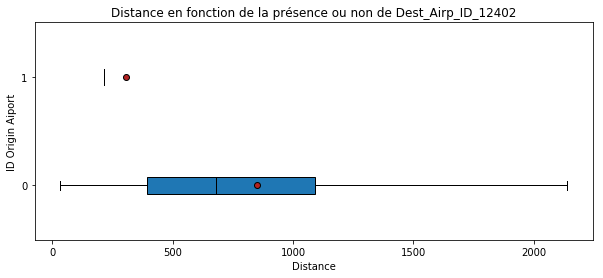

In [167]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Dest_Airp_ID_12402')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Dest_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Dest_Airp_ID_12402']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Dest_Airp_ID_12982 / DISTANCE

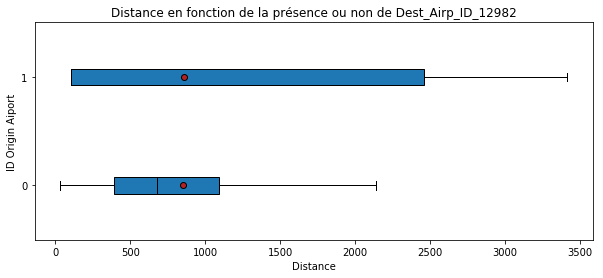

In [168]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Distance en fonction de la présence ou non de Dest_Airp_ID_12982')
plt.xlabel('Distance')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_1['Dest_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_1[data_plane_ID_AIRPORT_1['Dest_Airp_ID_12982']==m]['DISTANCE'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Forte Corrélation

<span style="color:#3366ff"> <strong> Conclusion: </strong> Certains aéroports ont une forte corrélation avec la variable DISTANCE. 
    
<span style="color:#3366ff"> --> Les modèles linéaires ne devront donc pas contenir ces ID Aéroports et la variable DISTANCE en même temps.

<strong> Quali / Quanti: ARR_DELAY / ID Origin Aiport

Dest_Airp_ID_12173 / ARR_DELAY

In [169]:
data_plane_ID_AIRPORT_2 = pd.concat([data_plane_CLEAN_s['ARR_DELAY'], ID_AIRPORT_], axis=1)

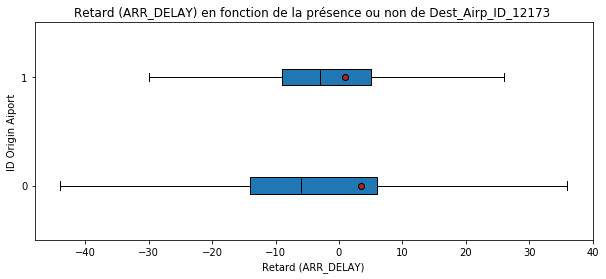

In [170]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Dest_Airp_ID_12173 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Dest_Airp_ID_12173']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12173 / ARR_DELAY

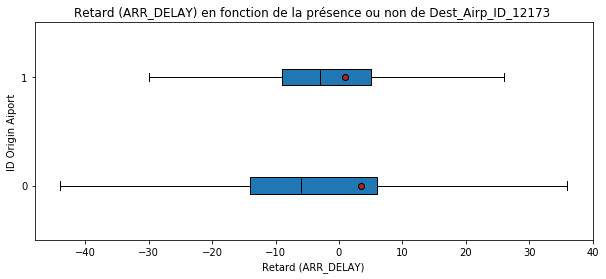

In [171]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Dest_Airp_ID_12173 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Dest_Airp_ID_12173']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12173 / ARR_DELAY

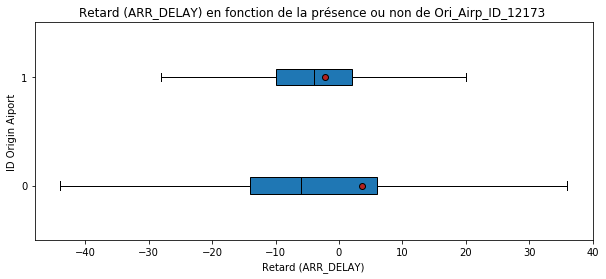

In [172]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12173 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Ori_Airp_ID_12173']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_13830 / ARR_DELAY

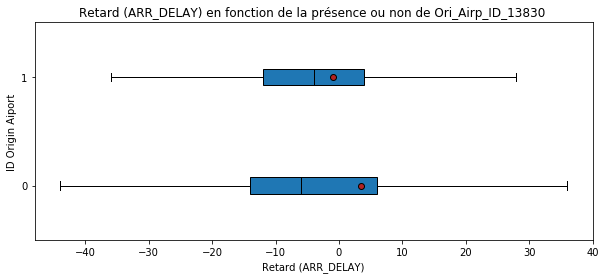

In [173]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Ori_Airp_ID_13830 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Ori_Airp_ID_13830']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12758 / ARR_DELAY

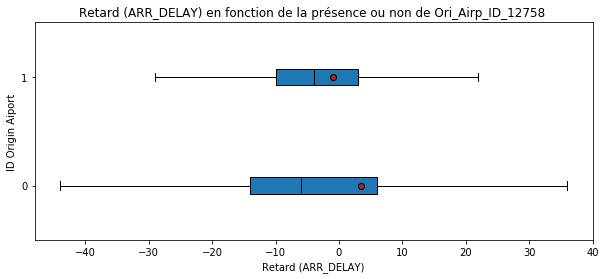

In [174]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12758 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Ori_Airp_ID_12758']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12982 / ARR_DELAY

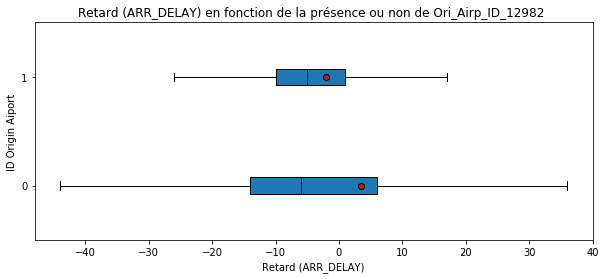

In [175]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12982 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Ori_Airp_ID_12982']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Dest_Airp_ID_13830 / ARR_DELAY

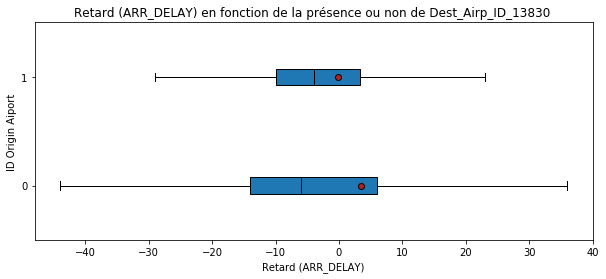

In [176]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Dest_Airp_ID_13830 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Dest_Airp_ID_13830']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12402 / ARR_DELAY

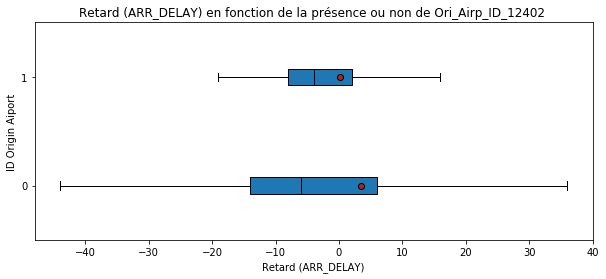

In [177]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12402 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Ori_Airp_ID_12402']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12173 / ARR_DELAY

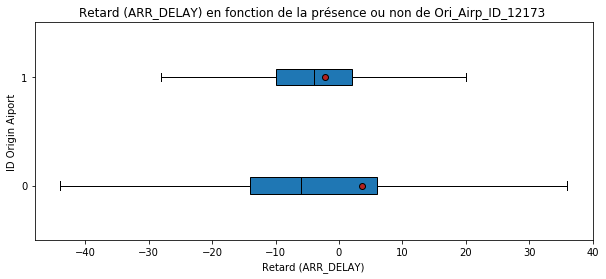

In [178]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12173 ')
plt.xlabel('Retard (ARR_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_2[data_plane_ID_AIRPORT_2['Ori_Airp_ID_12173']==m]['ARR_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

<strong> Quali / Quanti: ARR_DELAY_NEW / ID Origin Aiport

In [179]:
data_plane_ID_AIRPORT_3 = pd.concat([data_plane_CLEAN_s['ARR_DELAY_NEW'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / ARR_DELAY_NEW

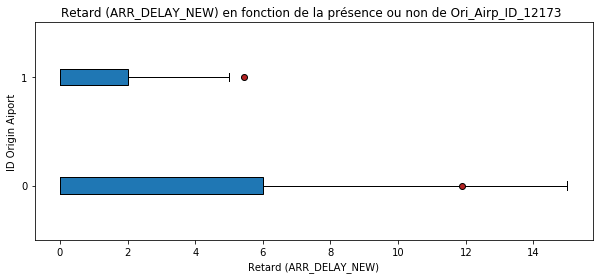

In [180]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12173 ')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Ori_Airp_ID_12173']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12173 / ARR_DELAY_NEW

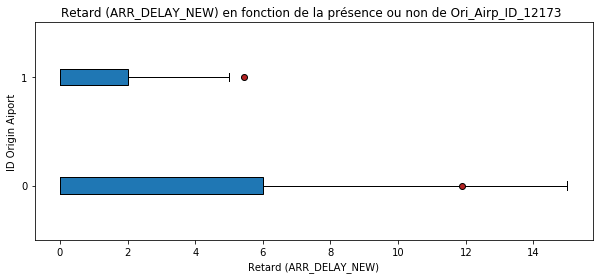

In [181]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12173 ')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Ori_Airp_ID_12173']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_13830 / ARR_DELAY_NEW

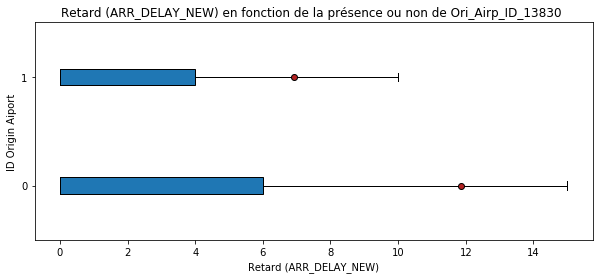

In [182]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_13830 ')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Ori_Airp_ID_13830']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12758 / ARR_DELAY_NEW

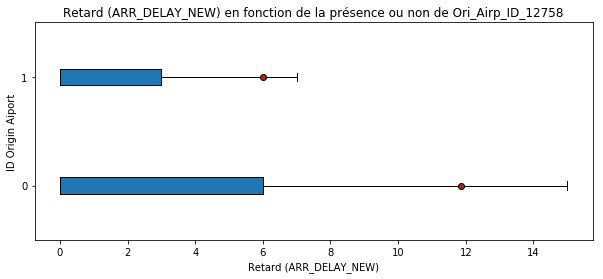

In [183]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Ori_Airp_ID_12758']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de corrélation

Ori_Airp_ID_12982 / ARR_DELAY_NEW

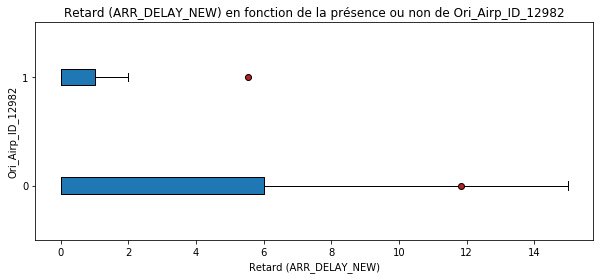

In [184]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("Ori_Airp_ID_12982")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Ori_Airp_ID_12982']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / ARR_DELAY_NEW

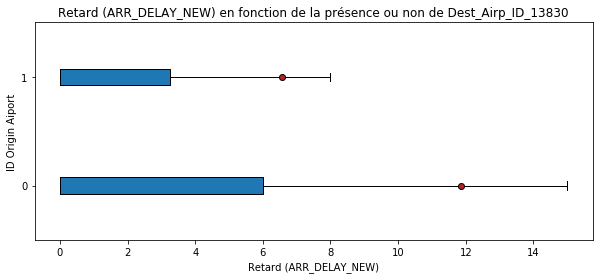

In [185]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Dest_Airp_ID_13830']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402 / ARR_DELAY_NEW

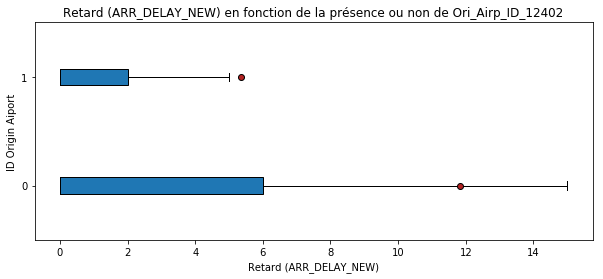

In [186]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (ARR_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_3['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_3[data_plane_ID_AIRPORT_3['Ori_Airp_ID_12402']==m]['ARR_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

<strong> Quali / Quanti: ARR_DEL15 / ID Origin Aiport

In [187]:
data_plane_ID_AIRPORT_4 = pd.concat([data_plane_CLEAN_s['ARR_DEL15'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / ARR_DEL15

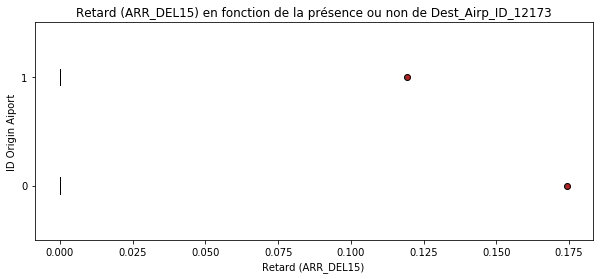

In [188]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_4['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Dest_Airp_ID_12173']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12173 / ARR_DEL15

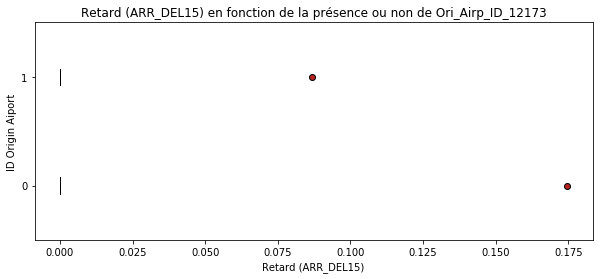

In [189]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_4['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Ori_Airp_ID_12173']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_13830 / ARR_DEL15

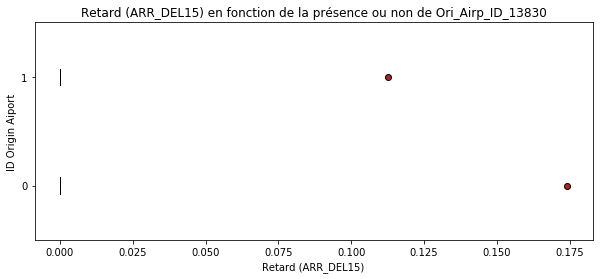

In [190]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_4['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Ori_Airp_ID_13830']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12758 / ARR_DEL15

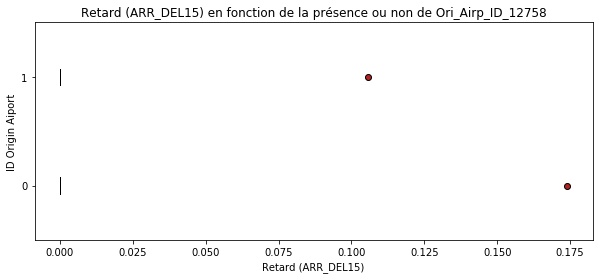

In [191]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_4['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Ori_Airp_ID_12758']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12982 / ARR_DEL15

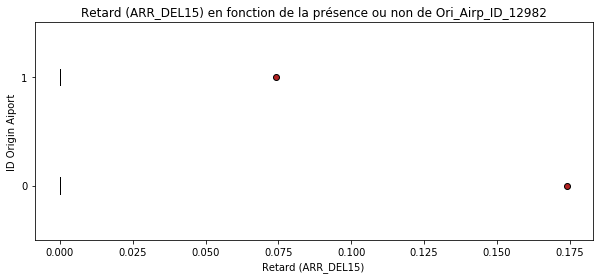

In [192]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_4['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Ori_Airp_ID_12982']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / ARR_DEL15

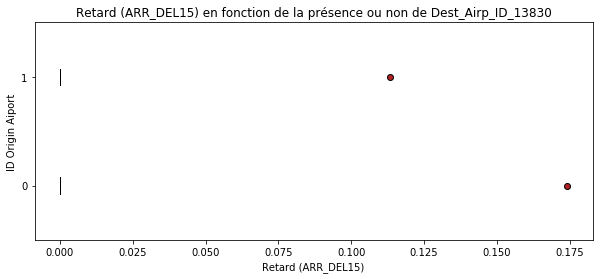

In [193]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_4['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Dest_Airp_ID_13830']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402 / ARR_DEL15

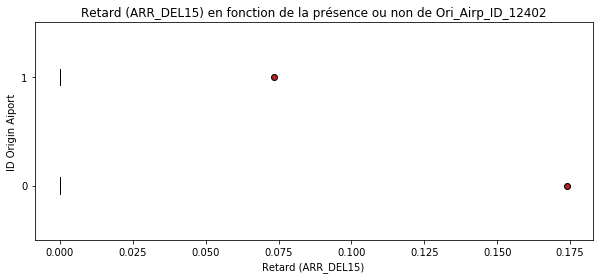

In [194]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (ARR_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_2['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_4[data_plane_ID_AIRPORT_4['Ori_Airp_ID_12402']==m]['ARR_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

<strong> Quali / Quanti: ARR_DELAY_GROUP / ID Origin Aiport

In [195]:
data_plane_ID_AIRPORT_5 = pd.concat([data_plane_CLEAN_s['ARR_DELAY_GROUP'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / ARR_DELAY_GROUP

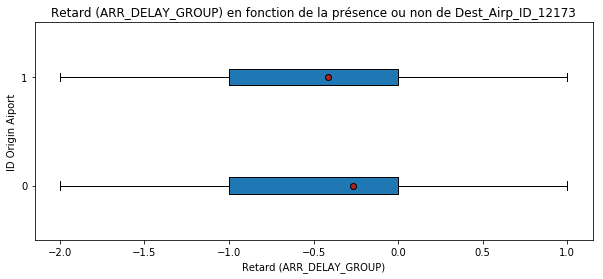

In [196]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Dest_Airp_ID_12173']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12173 / ARR_DELAY_GROUP

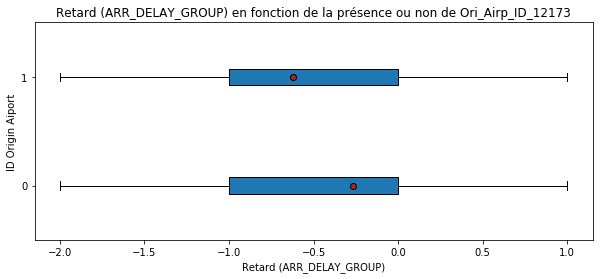

In [197]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Ori_Airp_ID_12173']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_13830 / ARR_DELAY_GROUP

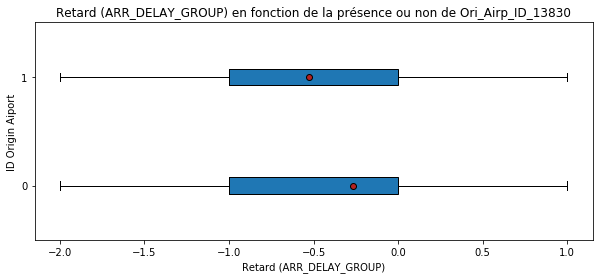

In [198]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Ori_Airp_ID_13830']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12758 / ARR_DELAY_GROUP

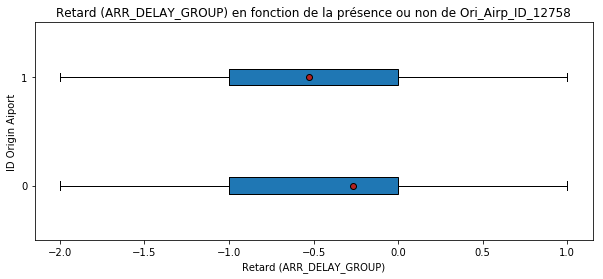

In [199]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Ori_Airp_ID_12758']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12982 / ARR_DELAY_GROUP

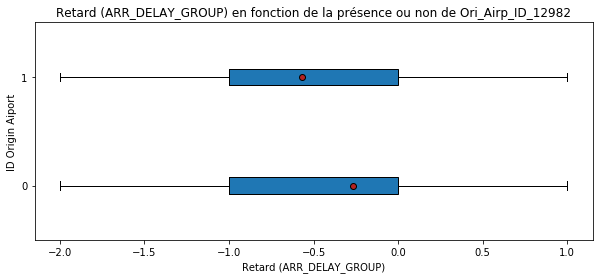

In [200]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Ori_Airp_ID_12982']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / ARR_DELAY_GROUP

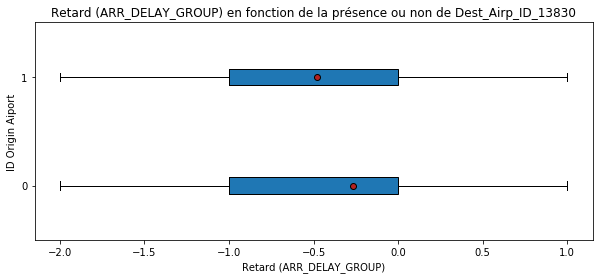

In [201]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Dest_Airp_ID_13830']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402 / ARR_DELAY_GROUP

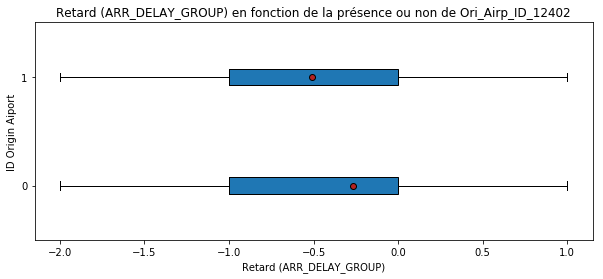

In [202]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (ARR_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (ARR_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_5['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_5[data_plane_ID_AIRPORT_5['Ori_Airp_ID_12402']==m]['ARR_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

<strong> Quali / Quanti: DEP_DELAY / ID Origin Aiport

In [203]:
data_plane_ID_AIRPORT_6 = pd.concat([data_plane_CLEAN_s['DEP_DELAY'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / DEP_DELAY

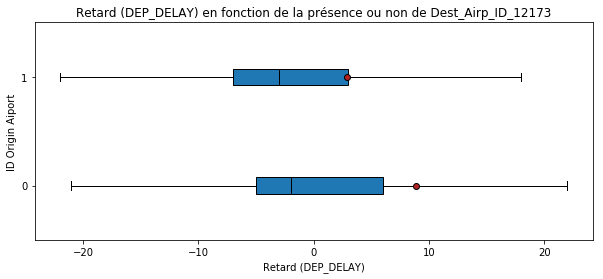

In [204]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Dest_Airp_ID_12173']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12173 / DEP_DELAY

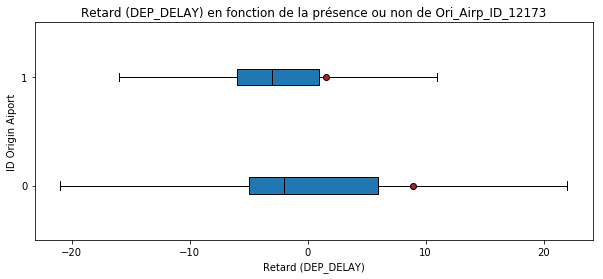

In [205]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Ori_Airp_ID_12173']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_13830 / DEP_DELAY      

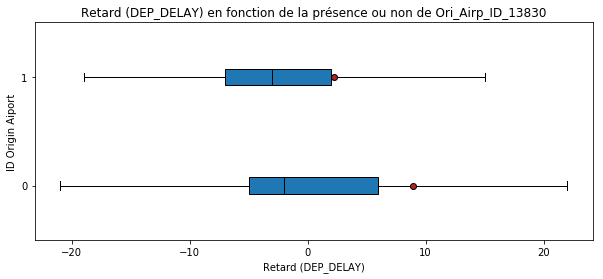

In [206]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Ori_Airp_ID_13830']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12758  / DEP_DELAY

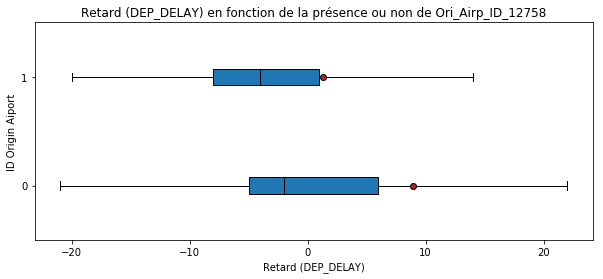

In [207]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Ori_Airp_ID_12758']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12982 / DEP_DELAY

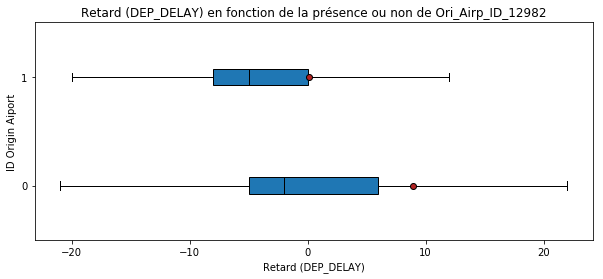

In [208]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Ori_Airp_ID_12982']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / DEP_DELAY

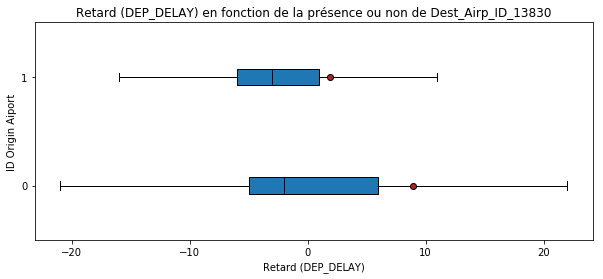

In [209]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Dest_Airp_ID_13830']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402 / DEP_DELAY

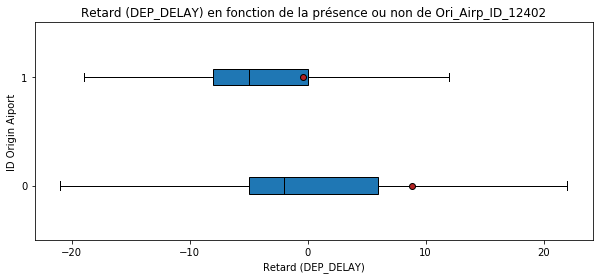

In [210]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (DEP_DELAY)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_6['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_6[data_plane_ID_AIRPORT_6['Ori_Airp_ID_12402']==m]['DEP_DELAY'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

<strong> Quali / Quanti: DEP_DELAY_NEW / ID Origin Aiport

In [211]:
data_plane_ID_AIRPORT_7 = pd.concat([data_plane_CLEAN_s['DEP_DELAY_NEW'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / DEP_DELAY_NEW

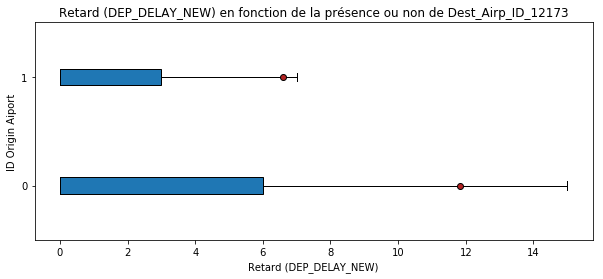

In [212]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Dest_Airp_ID_12173']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12173 / DEP_DELAY_NEW

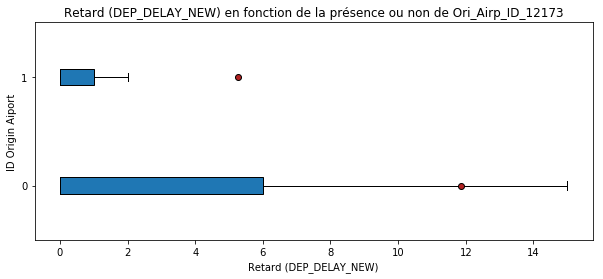

In [213]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Ori_Airp_ID_12173']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_13830 / DEP_DELAY_NEW

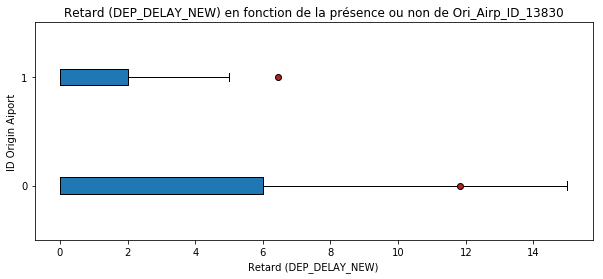

In [214]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Ori_Airp_ID_13830']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12758 / DEP_DELAY_NEW

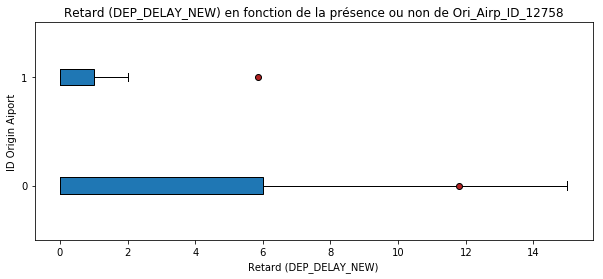

In [215]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Ori_Airp_ID_12758']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12982 / DEP_DELAY_NEW

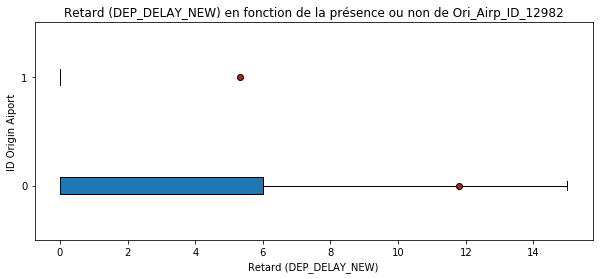

In [216]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Ori_Airp_ID_12982']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / DEP_DELAY_NEW

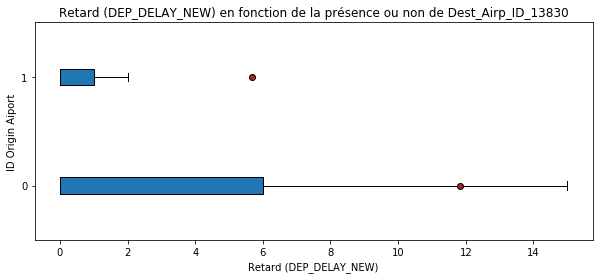

In [217]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Dest_Airp_ID_13830']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402  / DEP_DELAY_NEW

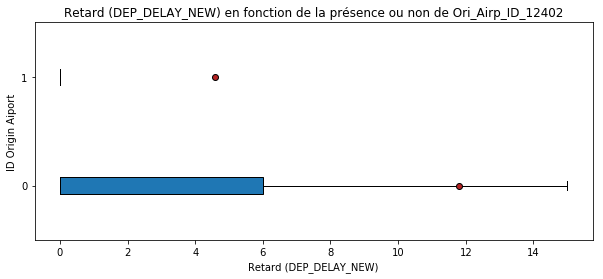

In [218]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_NEW) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (DEP_DELAY_NEW)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_7['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_7[data_plane_ID_AIRPORT_7['Ori_Airp_ID_12402']==m]['DEP_DELAY_NEW'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

<strong> Quali / Quanti: DEP_DEL15 / ID Origin Aiport

In [219]:
data_plane_ID_AIRPORT_8 = pd.concat([data_plane_CLEAN_s['DEP_DEL15'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / DEP_DEL15

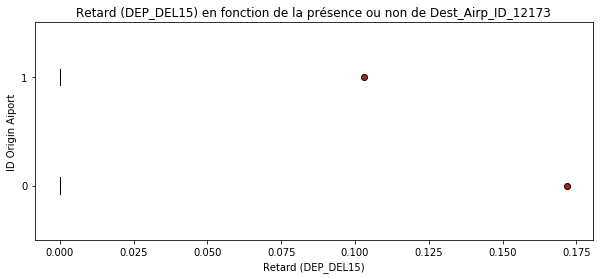

In [220]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Dest_Airp_ID_12173']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12173 / DEP_DEL15

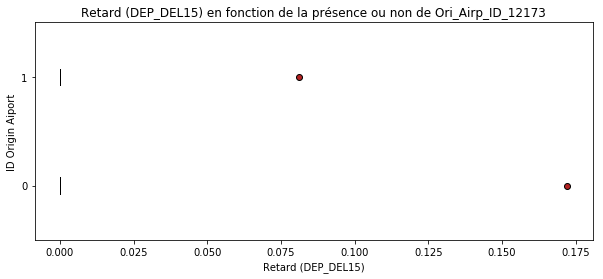

In [221]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Ori_Airp_ID_12173']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_13830 / DEP_DEL15

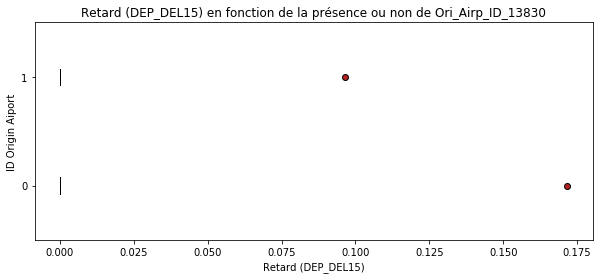

In [222]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Ori_Airp_ID_13830']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12758 / DEP_DEL15

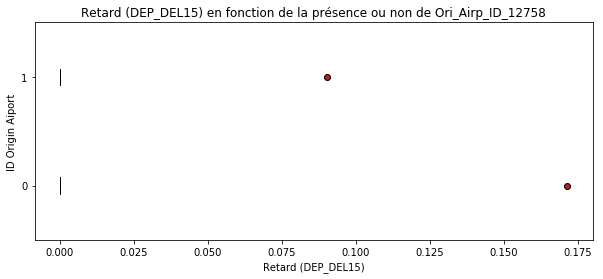

In [223]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Ori_Airp_ID_12758']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12982 / DEP_DEL15

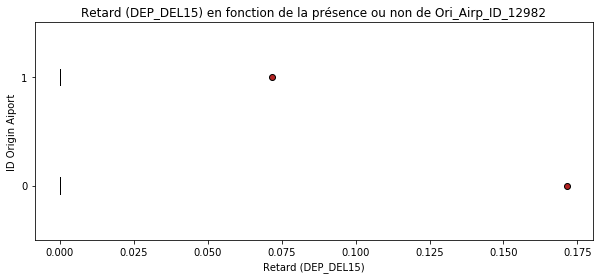

In [224]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Ori_Airp_ID_12982']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / DEP_DEL15

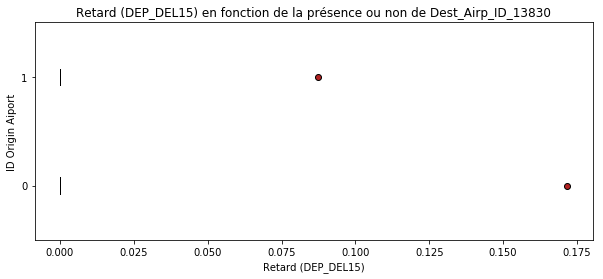

In [225]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Dest_Airp_ID_13830']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402 / DEP_DEL15

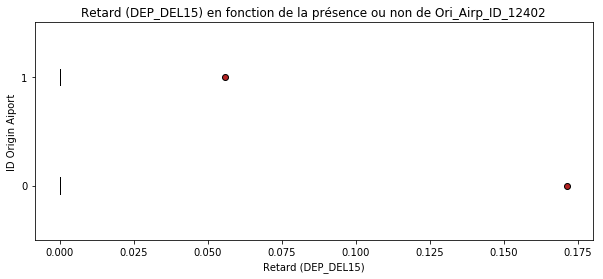

In [226]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DEL15) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (DEP_DEL15)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_8['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_8[data_plane_ID_AIRPORT_8['Ori_Airp_ID_12402']==m]['DEP_DEL15'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

<strong> Quali / Quanti: DEP_DELAY_GROUP / ID Origin Aiport

In [227]:
data_plane_ID_AIRPORT_9 = pd.concat([data_plane_CLEAN_s['DEP_DELAY_GROUP'], ID_AIRPORT_], axis=1)

Dest_Airp_ID_12173 / DEP_DELAY_GROUP

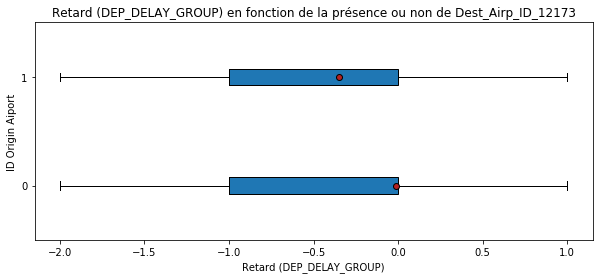

In [228]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Dest_Airp_ID_12173')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Dest_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Dest_Airp_ID_12173']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12173 / DEP_DELAY_GROUP

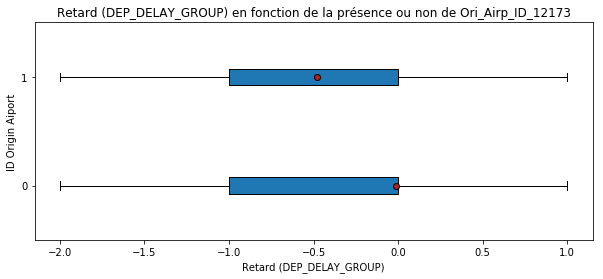

In [229]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12173')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Ori_Airp_ID_12173'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Ori_Airp_ID_12173']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_13830 / DEP_DELAY_GROUP

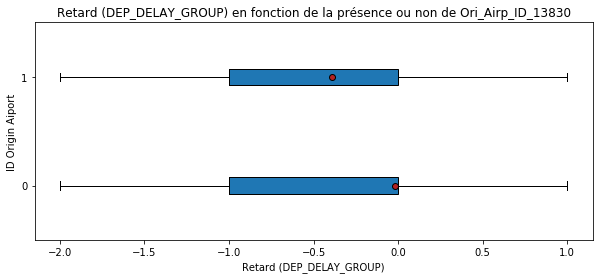

In [230]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_13830')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Ori_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Ori_Airp_ID_13830']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12758 / DEP_DELAY_GROUP

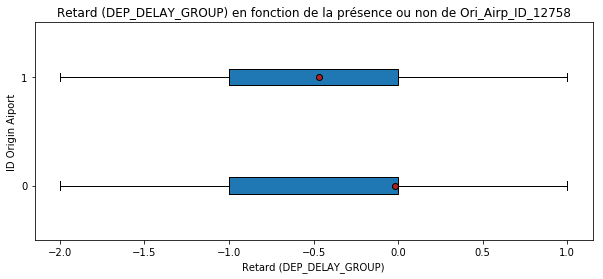

In [231]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12758')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Ori_Airp_ID_12758'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Ori_Airp_ID_12758']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12982 / DEP_DELAY_GROUP

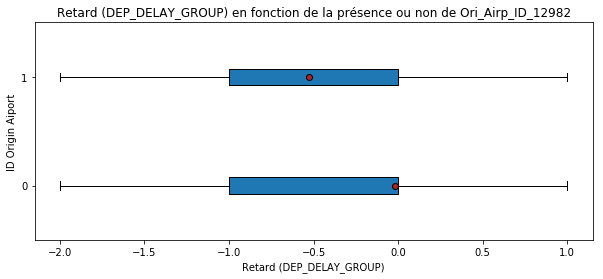

In [232]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12982')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Ori_Airp_ID_12982'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Ori_Airp_ID_12982']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Dest_Airp_ID_13830 / DEP_DELAY_GROUP

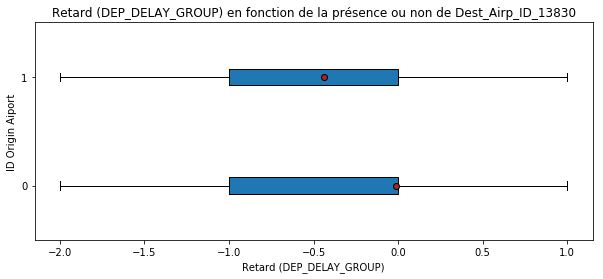

In [233]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Dest_Airp_ID_13830')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Dest_Airp_ID_13830'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Dest_Airp_ID_13830']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

Ori_Airp_ID_12402 / DEP_DELAY_GROUP

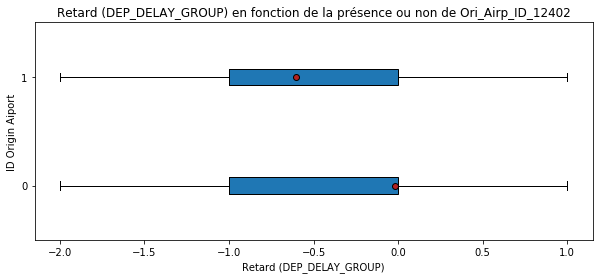

In [234]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.set_title('Retard (DEP_DELAY_GROUP) en fonction de la présence ou non de Ori_Airp_ID_12402')
plt.xlabel('Retard (DEP_DELAY_GROUP)')
plt.ylabel("ID Origin Aiport")

groupes = []

ID_airport = data_plane_ID_AIRPORT_9['Ori_Airp_ID_12402'].sort_values()
ID_airport = ID_airport.unique()
for m in ID_airport:
    groupes.append(data_plane_ID_AIRPORT_9[data_plane_ID_AIRPORT_9['Ori_Airp_ID_12402']==m]['DEP_DELAY_GROUP'])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, 
            labels=ID_airport, 
            medianprops=medianprops, 
            vert=False, 
            patch_artist=True, 
            showmeans=True, 
            meanprops=meanprops, 
            showfliers= False)
plt.show()

<span style="color:#3366ff"> Pas de Corrélation

### Conclusion des analyses bi variées

<span style="color:#3366ff"> Puisque les paramètres DISTANCE et les ID des Aéroports sont corrélés, ils ne devront pas être utilisés simultanéments dans les modèles de ML.

# Création du dataframe 'X' avec les params conservés

In [235]:
data_plane_CLEAN_X = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index 
'MONTH', 
'DAY_OF_MONTH',                                     
'DAY_OF_WEEK',                                                       
'CRS_DEP_TIME',          
'CRS_ARR_TIME' ,                                   
'AIR_TIME',                                     
'FLIGHTS',             
'DISTANCE',            
                                          ])

In [236]:
shapeT = data_plane_CLEAN_X.shape

print("Cette base de données contient",shapeT[0], 
      "vols décrits avec", shapeT[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 9 paramètres.


In [237]:
data_plane_CLEAN_X = data_plane_CLEAN_X.set_index('UNIQUE_CARRIER')

In [238]:
data_plane_CLEAN_X.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,FLIGHTS,DISTANCE
UNIQUE_CARRIER,,,,,,,,
DL,1,15,5,1900.0,2056.0,78.0,1.0,545.0
AS,1,6,3,635.0,1219.0,211.0,1.0,1660.0
WN,1,23,6,1330.0,1645.0,120.0,1.0,861.0
WN,1,27,3,1605.0,1730.0,63.0,1.0,423.0
B6,1,25,1,1215.0,1459.0,153.0,1.0,1056.0
HA,1,25,1,1132.0,1215.0,20.0,1.0,100.0
DL,1,23,6,1337.0,2125.0,311.0,1.0,2677.0
NK,1,11,1,1552.0,1707.0,116.0,1.0,689.0
EV,1,21,4,1633.0,1810.0,132.0,1.0,771.0


# Création du dataframe 'X_light' sans DISTANCE

In [239]:
data_plane_CLEAN_X_light = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index 
'MONTH', 
'DAY_OF_MONTH',                                     
'DAY_OF_WEEK',                                                       
'CRS_DEP_TIME',          
'CRS_ARR_TIME' ,                                   
'AIR_TIME',                                     
'FLIGHTS',             
#'DISTANCE',            
                                          ])

# CLEAN_1: Concaténation des 215 airport ID & de data_plane_CLEAN_X

data_plane_CLEAN_1 = pd.concat([data_plane_CLEAN_X, data_plane_dumm], axis=1)

shape = data_plane_CLEAN_1.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

data_plane_CLEAN_1 = data_plane_CLEAN_1.fillna(0)

data_plane_CLEAN_1 = data_plane_CLEAN_1.set_index('UNIQUE_CARRIER')

data_plane_CLEAN_1.head()

shape = data_plane_CLEAN_1.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

# Concaténation des 10 Airport ID et de data_plane_CLEAN_X

data_plane_CLEAN_10ID = pd.concat([data_plane_CLEAN_X, ID_AIRPORT_], axis=1)

shape = data_plane_CLEAN_10ID.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

data_plane_CLEAN_10ID = data_plane_CLEAN_10ID.fillna(0)

data_plane_CLEAN_10ID = data_plane_CLEAN_10ID.set_index('UNIQUE_CARRIER')

# Concaténation des 10 Airport ID et de data_plane_CLEAN_X_light

Dest_Airp_ID_12173    
Ori_Airp_ID_12173    
Ori_Airp_ID_13830    
Ori_Airp_ID_12758    
Ori_Airp_ID_12982    
Dest_Airp_ID_13830    
Dest_Airp_ID_12758    
Dest_Airp_ID_12982    
Dest_Airp_ID_12402    
Ori_Airp_ID_12402    

In [240]:
data_plane_CLEAN_10ID_light = pd.concat([data_plane_CLEAN_X_light, ID_AIRPORT_], axis=1)

shape = data_plane_CLEAN_10ID_light.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 18 paramètres.


In [241]:
data_plane_CLEAN_10ID_light = data_plane_CLEAN_10ID_light.fillna(0)

In [242]:
data_plane_CLEAN_10ID_light = data_plane_CLEAN_10ID_light.set_index('UNIQUE_CARRIER')

In [243]:
data_plane_CLEAN_10ID_light.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,FLIGHTS,Ori_Airp_ID_12173,Dest_Airp_ID_12173,Ori_Airp_ID_13830,Dest_Airp_ID_13830,Dest_Airp_ID_12982,Ori_Airp_ID_12982,Dest_Airp_ID_12758,Dest_Airp_ID_12402,Ori_Airp_ID_12758,Ori_Airp_ID_12402
UNIQUE_CARRIER,,,,,,,,,,,,,,,,,
DL,1,15,5,1900.0,2056.0,78.0,1.0,0,0,0,0,0,0,0,0,0,0
AS,1,6,3,635.0,1219.0,211.0,1.0,0,0,0,0,0,0,0,0,0,0
WN,1,23,6,1330.0,1645.0,120.0,1.0,0,0,0,0,0,0,0,0,0,0
WN,1,27,3,1605.0,1730.0,63.0,1.0,0,0,0,0,0,0,0,0,0,0
B6,1,25,1,1215.0,1459.0,153.0,1.0,0,0,0,0,0,0,0,0,0,0
HA,1,25,1,1132.0,1215.0,20.0,1.0,1,0,0,1,0,0,0,0,0,0
DL,1,23,6,1337.0,2125.0,311.0,1.0,1,0,0,0,0,0,0,0,0,0
NK,1,11,1,1552.0,1707.0,116.0,1.0,0,0,0,0,0,0,0,0,0,0
EV,1,21,4,1633.0,1810.0,132.0,1.0,0,0,0,0,0,0,0,0,0,0


### Création du dataframe 'y 1' - ARR_DELAY

In [244]:
data_plane_CLEAN_y_1 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'ARR_DELAY'                            
                                          ])

In [245]:
data_plane_CLEAN_y_1 = data_plane_CLEAN_y_1.set_index('UNIQUE_CARRIER')

In [246]:
data_plane_CLEAN_y_1.head(10)

,ARR_DELAY
UNIQUE_CARRIER,
DL,87.0
AS,8.0
WN,17.0
WN,-14.0
B6,43.0
HA,-12.0
DL,24.0
NK,10.0
EV,26.0


In [247]:
shape = data_plane_CLEAN_y_1.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 2' - ARR_DELAY_NEW

In [248]:
data_plane_CLEAN_y_2 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'ARR_DELAY_NEW'                            
                                          ])

In [249]:
data_plane_CLEAN_y_2 = data_plane_CLEAN_y_2.set_index('UNIQUE_CARRIER')

In [250]:
data_plane_CLEAN_y_2.head(10)

,ARR_DELAY_NEW
UNIQUE_CARRIER,
DL,87.0
AS,8.0
WN,17.0
WN,0.0
B6,43.0
HA,0.0
DL,24.0
NK,10.0
EV,26.0


In [251]:
shape = data_plane_CLEAN_y_2.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 3' - ARR_DEL15

In [252]:
data_plane_CLEAN_y_3 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'ARR_DEL15'                            
                                          ])

In [253]:
data_plane_CLEAN_y_3 = data_plane_CLEAN_y_3.set_index('UNIQUE_CARRIER')

In [254]:
data_plane_CLEAN_y_3.head(10)

,ARR_DEL15
UNIQUE_CARRIER,
DL,1.0
AS,0.0
WN,1.0
WN,0.0
B6,1.0
HA,0.0
DL,1.0
NK,0.0
EV,1.0


In [255]:
shape = data_plane_CLEAN_y_3.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 4' - ARR_DELAY_GROUP

In [256]:
data_plane_CLEAN_y_4 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'ARR_DELAY_GROUP'                            
                                          ])

In [257]:
data_plane_CLEAN_y_4 = data_plane_CLEAN_y_4.set_index('UNIQUE_CARRIER')


In [258]:
data_plane_CLEAN_y_4.head(10)

,ARR_DELAY_GROUP
UNIQUE_CARRIER,
DL,5.0
AS,0.0
WN,1.0
WN,-1.0
B6,2.0
HA,-1.0
DL,1.0
NK,0.0
EV,1.0


In [259]:
shape = data_plane_CLEAN_y_4.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 5' - DEP_DELAY

In [260]:
data_plane_CLEAN_y_5 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'DEP_DELAY'                            
                                          ])

In [261]:
data_plane_CLEAN_y_5 = data_plane_CLEAN_y_5.set_index('UNIQUE_CARRIER')


In [262]:
data_plane_CLEAN_y_5.head(10)

,DEP_DELAY
UNIQUE_CARRIER,
DL,94.0
AS,-1.0
WN,-2.0
WN,-8.0
B6,25.0
HA,-9.0
DL,28.0
NK,14.0
EV,19.0


In [263]:
shape = data_plane_CLEAN_y_5.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 6'  - DEP_DELAY_NEW

In [264]:
data_plane_CLEAN_y_6 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'DEP_DELAY_NEW'                            
                                          ])

In [265]:
data_plane_CLEAN_y_6 = data_plane_CLEAN_y_6.set_index('UNIQUE_CARRIER')


In [266]:
data_plane_CLEAN_y_6.head(10)

,DEP_DELAY_NEW
UNIQUE_CARRIER,
DL,94.0
AS,0.0
WN,0.0
WN,0.0
B6,25.0
HA,0.0
DL,28.0
NK,14.0
EV,19.0


In [267]:
shape = data_plane_CLEAN_y_6.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 7' - DEP_DEL15

In [268]:
data_plane_CLEAN_y_7 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'DEP_DEL15'                            
                                          ])

In [269]:
data_plane_CLEAN_y_7 = data_plane_CLEAN_y_7.set_index('UNIQUE_CARRIER')


In [270]:
data_plane_CLEAN_y_7.head(10)

,DEP_DEL15
UNIQUE_CARRIER,
DL,1.0
AS,0.0
WN,0.0
WN,0.0
B6,1.0
HA,0.0
DL,1.0
NK,0.0
EV,1.0


In [271]:
shape = data_plane_CLEAN_y_7.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


### Création du dataframe 'y 8'  - DEP_DELAY_GROUP

In [272]:
data_plane_CLEAN_y_8 = pd.DataFrame(data_plane_CLEAN_s,
                                columns = [   
'UNIQUE_CARRIER',      # pour l'identification = index                                 
'DEP_DELAY_GROUP'                            
                                          ])

In [273]:
data_plane_CLEAN_y_8 = data_plane_CLEAN_y_8.set_index('UNIQUE_CARRIER')


In [274]:
data_plane_CLEAN_y_8.head(10)

,DEP_DELAY_GROUP
UNIQUE_CARRIER,
DL,6.0
AS,-1.0
WN,-1.0
WN,-1.0
B6,1.0
HA,-1.0
DL,1.0
NK,0.0
EV,1.0


In [275]:
shape = data_plane_CLEAN_y_8.shape

print("Cette base de données contient",shape[0], 
      "vols décrits avec", shape[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


# Sauvegarde des bases cleanées au format CSV

In [276]:
# Sauvegarde de la base cleanée "data_plane_CLEAN_X" 
#'UNIQUE_CARRIER',      # pour l'identification = index 
#'MONTH', 
#'DAY_OF_MONTH',                                     
#'DAY_OF_WEEK',                                                       
#'CRS_DEP_TIME',          
#'CRS_ARR_TIME' ,                                   
#'AIR_TIME',                                     
#'FLIGHTS',             
#'DISTANCE', 
data_plane_CLEAN_X.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_X_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [277]:
data_plane_CLEAN_X.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,FLIGHTS,DISTANCE
UNIQUE_CARRIER,,,,,,,,
DL,1,15,5,1900.0,2056.0,78.0,1.0,545.0
AS,1,6,3,635.0,1219.0,211.0,1.0,1660.0
WN,1,23,6,1330.0,1645.0,120.0,1.0,861.0
WN,1,27,3,1605.0,1730.0,63.0,1.0,423.0
B6,1,25,1,1215.0,1459.0,153.0,1.0,1056.0
HA,1,25,1,1132.0,1215.0,20.0,1.0,100.0
DL,1,23,6,1337.0,2125.0,311.0,1.0,2677.0
NK,1,11,1,1552.0,1707.0,116.0,1.0,689.0
EV,1,21,4,1633.0,1810.0,132.0,1.0,771.0


200 airports ID

data_plane_CLEAN_1.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_1_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

data_plane_CLEAN_10ID.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_10ID.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [278]:
# Base utilisée dans le Notebook 2 Cleané
data_plane_CLEAN_10ID_light.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_10ID_light.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [279]:
data_plane_CLEAN_y_1.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_1_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [280]:
data_plane_CLEAN_y_2.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_2_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [281]:
data_plane_CLEAN_y_3.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_3_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [282]:
data_plane_CLEAN_y_4.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_4_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [283]:
data_plane_CLEAN_y_5.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_5_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [284]:
data_plane_CLEAN_y_6.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_6_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [285]:
data_plane_CLEAN_y_7.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_7_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

In [286]:
data_plane_CLEAN_y_8.to_csv(path_or_buf="DATA_clean/data_plane_CLEAN_y_8_full.csv", 
                 #sep="\t",
                 na_rep='',
                 float_format=None,
                 columns=None,
                 header=True,
                 index=True,
                 index_label='UNIQUE_CARRIER',
                 )

# CONCLUSION DU NOTEBOOK

<span style="color:#3366ff"> Sur les 65 paramètres d'origine ne seront conservés que:

<span style="color:#3366ff"> <strong> Les différents "X":</strong>    
<span style="color:#3366ff"> 'UNIQUE_CARRIER',      # pour l'identification = index      
<span style="color:#3366ff"> 'MONTH',    
<span style="color:#3366ff"> 'DAY_OF_MONTH',                                         
<span style="color:#3366ff"> 'DAY_OF_WEEK',                                                          
<span style="color:#3366ff"> 'CRS_DEP_TIME',             
<span style="color:#3366ff"> 'CRS_ARR_TIME' ,                                    
<span style="color:#3366ff"> 'AIR_TIME',                                     
<span style="color:#3366ff"> 'FLIGHTS',  
    
<span style="color:#3366ff"> 'DISTANCE'     
<span style="color:#3366ff"> ou   
<span style="color:#3366ff"> les ID des Aéroports d'Origine et de Destination les plus fréquents (issus de la déconcaténation):    
<span style="color:#3366ff">  Ori_Airp_ID_12173 & Dest_Airp_ID_12173      	
<span style="color:#3366ff">  Ori_Airp_ID_13830 & Dest_Airp_ID_13830     
<span style="color:#3366ff">  Ori_Airp_ID_12758 & Dest_Airp_ID_12758 	  	
<span style="color:#3366ff">  Ori_Airp_ID_12982 & Dest_Airp_ID_12982    	      
<span style="color:#3366ff">  Ori_Airp_ID_12402 & Dest_Airp_ID_12402     


<span style="color:#3366ff"> <strong> ... et les 8 différents "y":</strong>            
<span style="color:#3366ff"> 'ARR_DELAY'    
<span style="color:#3366ff"> 'ARR_DELAY_NEW'    
<span style="color:#3366ff"> 'ARR_DEL15'    
<span style="color:#3366ff"> 'ARR_DELAY_GROUP    
<span style="color:#3366ff"> 'DEP_DELAY'    
<span style="color:#3366ff"> 'DEP_DELAY_NEW'    
<span style="color:#3366ff"> 'DEP_DEL15'    
<span style="color:#3366ff"> 'DEP_DELAY_GROUP' 